In [1]:
# To print output of all the lines
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [2]:
import json
import os
from tempfile import mkdtemp


In [3]:
# Computation packages
import numpy as np
import pandas as pd


In [4]:
# Imbalanced class handling packages
from imblearn import pipeline as imb_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [5]:
# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [6]:
from utils import ExtractData


In [7]:
# Custom packages
from utils import (
    CategorizeCardinalData,
    StatisticalTest,
    feature_importance,
)
from utils.CustomPipeline import (
    CardinalityReducer,
    get_ct_feature_names,
    SelectColumnsTransfomer,
)


In [8]:
# Plotting packages
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


In [9]:
from joblib import Memory, dump, load


In [10]:
# Pipelines & transformers
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline


In [11]:
# module for dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA
from prince import FAMD


In [12]:
# Preprocessing modules
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)


In [13]:
# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier


In [14]:
# Model metric methods
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_precision_recall_curve,
)


In [15]:
# clustering
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering


In [16]:
# loading configuration values
with open("../config.json", "r") as f:
    config = json.load(f)


In [17]:
# configuration constant variables
INFREQUENT_CATEGORY_CUT_OFF = config[3]["INFREQUENT_CATEGORY_CUT_OFF"]
INFREQUENT_CATEGORY_LABEL = config[3]["INFREQUENT_CATEGORY_LABEL"]
RANDOM_STATE = config[3]["RANDOM_STATE"]
MISSING_VALUE_LABEL = config[3]["MISSING_VALUE_LABEL"]
EDA_REPORT_LOCATION = config[1]["eda_report_location"]
MODEL_REPOSITORY_LOCATION = config[1]["model_repository_location"]
NON_NAN_THRESHOLD = config[0]["threshold_nan"]
TEST_SIZE_FOR_SPLIT = config[3]["TEST_SIZE_FOR_SPLIT"]
RANDOM_STATE = config[3]["RANDOM_STATE"]
N_JOB_PARAM_VALUE = config[3]["N_JOB_PARAM_VALUE"]
VERBOSE_PARAM_VALUE = config[3]["VERBOSE_PARAM_VALUE"]


In [18]:
data = ExtractData.FetchSubset(subset_list=[15])


In [19]:
data_inpatient_claims = data.fetchFromInpatientDataset()

In [20]:
data_inpatient_claims.isna().sum() / data_inpatient_claims.shape[0]

DESYNPUF_ID    0.000000
CLM_ID         0.000000
SEGMENT        0.000000
CLM_FROM_DT    0.000868
CLM_THRU_DT    0.000868
                 ...   
HCPCS_CD_41    1.000000
HCPCS_CD_42    1.000000
HCPCS_CD_43    1.000000
HCPCS_CD_44    1.000000
HCPCS_CD_45    1.000000
Length: 81, dtype: float64

In [21]:
data_inpatient_claims.dropna(
    thresh=NON_NAN_THRESHOLD * data_inpatient_claims.shape[0], axis=1, inplace=True
)

In [22]:
data_inpatient_claims.columns
data_inpatient_claims.shape
data_inpatient_claims.isna().sum()


Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'CLM_ADMSN_DT', 'ADMTNG_ICD9_DGNS_CD',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'NCH_BENE_DSCHRG_DT', 'CLM_DRG_CD',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_PRCDR_CD_1'],
      dtype='object')

(66846, 29)

DESYNPUF_ID                           0
CLM_ID                                0
SEGMENT                               0
CLM_FROM_DT                          58
CLM_THRU_DT                          58
PRVDR_NUM                             0
CLM_PMT_AMT                           0
NCH_PRMRY_PYR_CLM_PD_AMT              0
AT_PHYSN_NPI                        643
OP_PHYSN_NPI                      27864
CLM_ADMSN_DT                          0
ADMTNG_ICD9_DGNS_CD                 617
CLM_PASS_THRU_PER_DIEM_AMT            0
NCH_BENE_IP_DDCTBL_AMT             2192
NCH_BENE_PTA_COINSRNC_LBLTY_AM        0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM        0
CLM_UTLZTN_DAY_CNT                   58
NCH_BENE_DSCHRG_DT                    0
CLM_DRG_CD                            0
ICD9_DGNS_CD_1                       80
ICD9_DGNS_CD_2                      500
ICD9_DGNS_CD_3                     1240
ICD9_DGNS_CD_4                     2807
ICD9_DGNS_CD_5                     5245
ICD9_DGNS_CD_6                     8384


In [23]:
# Processing of PRVDR_NUM column. Converting the data into categories
data_inpatient_claims["PRVDR_NUM"].value_counts()
prvdr_num = CategorizeCardinalData.ProviderNumCategoryCreator()
prvdr_num.get_categories_for_providers(data_inpatient_claims["PRVDR_NUM"])
data_inpatient_claims = data_inpatient_claims.merge(
    right=prvdr_num.unique_prvdr_num_category_df, on=["PRVDR_NUM"], how="left"
)



23006G    828
1000AH    675
3600NG    451
2600ZT    426
2100WC    425
         ... 
3401PA      1
3701DM      1
5013KJ      1
33S1JQ      1
2601YD      1
Name: PRVDR_NUM, Length: 2687, dtype: int64

In [24]:
diagnosis_code = [col for col in data_inpatient_claims.columns if "ICD9_DGNS" in col]
icd_procedural_code = [
    col for col in data_inpatient_claims.columns if "ICD9_PRCDR" in col
]
icd_hcpcs_code = [col for col in data_inpatient_claims.columns if "HCPCS_CD" in col]


In [25]:
# Preparing dataframe for categorizing
data_inpatient_claims[diagnosis_code + icd_procedural_code + icd_hcpcs_code] = (
    data_inpatient_claims[diagnosis_code + icd_procedural_code + icd_hcpcs_code]
    .astype("str")
    .replace(["nan", "na"], np.nan)
)


In [26]:
# Processing of Procdural Code columns
proc_code = CategorizeCardinalData.ProcedureCodeCategoryCreator()
proc_code.get_categories_for_procedure_code(data_inpatient_claims[icd_procedural_code])
for col in icd_procedural_code:
    data_inpatient_claims[f"{col}"] = data_inpatient_claims[f"{col}"].str[:2]
    data_inpatient_claims[f"{col}_CAT"] = pd.merge(
        left=data_inpatient_claims,
        right=proc_code.unique_procedure_code_category_df,
        left_on=col,
        right_on="Procedure_code",
        how="left",
    )["Procedure_code_CAT"]


In [27]:
# Processing of Diagnosis Code
diag_code = CategorizeCardinalData.DiagnosisCodeCategoryCreator()
diag_code.get_categories_for_diagnosis_code(data_inpatient_claims[diagnosis_code])
for col in diagnosis_code:
    data_inpatient_claims[f"{col}"] = data_inpatient_claims[f"{col}"].str[:3]
    data_inpatient_claims[f"{col}_CAT"] = pd.merge(
        left=data_inpatient_claims,
        right=diag_code.unique_diagnosis_code_category_df,
        left_on=col,
        right_on="Diagnosis_code",
        how="left",
    )["Description"]


In [28]:
# Create a year column for merging with beneficiary summary data
data_inpatient_claims["CLAIM_YEAR"] = data_inpatient_claims["CLM_ADMSN_DT"].dt.year


In [29]:
# selecting desease as 390-459 or Desease of Circulatory system since it has maximum data
diagnosis_code_cat = [
    col for col in data_inpatient_claims if ("_CAT" in col) & ("DGNS" in col)
]

selected_icd_code = "390-459"
selected_data = data_inpatient_claims.loc[
    data_inpatient_claims[diagnosis_code_cat].isin([selected_icd_code]).any(axis=1), :,
].copy()


In [30]:
# Generating target variable
selected_data.loc[:, "Next_CLM_ADMSN_DT"] = selected_data.groupby("DESYNPUF_ID")[
    "CLM_ADMSN_DT"
].shift(-1)

# Calculatings days between patient admission and the previous time the patient was discharged
selected_data.loc[:, "Readmission_Day_Count"] = (
    selected_data["Next_CLM_ADMSN_DT"] - selected_data["NCH_BENE_DSCHRG_DT"]
).apply(lambda x: x.days)

# if the Readmission_Day_Count <= 30, the Unplanned readmission is 1 or else 0
selected_data.loc[:, "IsReadmitted"] = (
    selected_data.loc[:, "Readmission_Day_Count"] <= 30
) * 1

selected_data.drop(columns="Readmission_Day_Count", inplace=True)
selected_data.sort_values(
    by=["DESYNPUF_ID", "NCH_BENE_DSCHRG_DT"], ascending=True, inplace=True
)

In [31]:
# Removing the not readmitted record for the patient which have atleast one admitted record
readmitted_patients_data = selected_data.loc[
    (selected_data["IsReadmitted"] == 1), :
]
readmitted_patients = readmitted_patients_data.loc[:, "DESYNPUF_ID"].unique()

drop_index = selected_data.loc[
    (selected_data["DESYNPUF_ID"].isin(readmitted_patients))
    & (selected_data["IsReadmitted"] == 0)
].index

selected_data.drop(index=drop_index, axis=0, inplace=True)
readmitted_patients_data = selected_data.loc[
    (selected_data["IsReadmitted"] == 1), :
]
not_readmitted_patients_data = selected_data.loc[
    (selected_data["IsReadmitted"] == 0), :
]

# Uncomment the below line to remove duplicate patient from non readmitted data
# not_readmitted_patients_data.drop_duplicates(subset=["DESYNPUF_ID", "IsReadmitted"], keep='last', inplace=True)

final_inpatient_data = pd.concat(
    [readmitted_patients_data, not_readmitted_patients_data], axis=0
)


In [32]:
final_inpatient_data.drop(columns=icd_procedural_code + diagnosis_code, inplace=True)


In [33]:
data_outpatient_claim = data.fetchFromOutpatientDataset()


In [34]:
data_outpatient_claim.dropna(
    thresh=NON_NAN_THRESHOLD * data_outpatient_claim.shape[0], axis=1, inplace=True
)

In [35]:
# data_outpatient_claim["PRVDR_NUM"].value_counts()
# prvdr_num.get_categories_for_providers(data_outpatient_claim["PRVDR_NUM"])
# data_outpatient_claim = data_outpatient_claim.merge(
#     right=prvdr_num.unique_prvdr_num_category_df, on=["PRVDR_NUM"], how="left"
# )


In [36]:
data_outpatient_claim.head()

DESYNPUF_ID           CLM_ID  SEGMENT CLM_FROM_DT CLM_THRU_DT  \
0  00009465E4889B32  436672204422683        1  2009-05-06  2009-05-26   
1  00009465E4889B32  436912204281624        1  2009-08-02  2009-08-02   
2  000277138BEF1994  436462204226631        1  2009-04-16  2009-04-16   
3  000277138BEF1994  436442204314324        1  2009-07-09  2009-07-09   
4  000277138BEF1994  436532204442234        1  2009-12-06  2009-12-07   

  PRVDR_NUM  CLM_PMT_AMT  NCH_PRMRY_PYR_CLM_PD_AMT  AT_PHYSN_NPI  \
0    01016U       1100.0                       0.0  2.822154e+09   
1    01008J         60.0                       0.0  6.574854e+09   
2    1501YV         10.0                       0.0  5.393065e+09   
3    1500AJ        500.0                       0.0  9.079780e+09   
4    1500XC         90.0                       0.0  8.003551e+09   

   NCH_BENE_BLOOD_DDCTBL_LBLTY_AM ICD9_DGNS_CD_1 ICD9_DGNS_CD_2  \
0                             0.0           V451           2766   
1                             0.0           9633           2762   
2                             0.0          42732            NaN   
3                             0.0          V6801           3310   
4                             0.0           8190          71504   

   NCH_BENE_PTB_DDCTBL_AMT  NCH_BENE_PTB_COINSRNC_AMT HCPCS_CD_1 HCPCS_CD_2  \
0                      0.0                      400.0      A4657      90999   
1                      0.0                        0.0      36415      85610   
2                      0.0                        0.0      85610      80053   
3                      0.0                       10.0      36415      87070   
4                      0.0                       10.0        NaN        NaN   

  HCPCS_CD_3  
0      90999  
1      81025  
2        NaN  
3        NaN  
4      51701

In [37]:
diagnosis_code_out = [
    col for col in data_outpatient_claim.columns if "ICD9_DGNS" in col
]
icd_procedural_code_out = [
    col for col in data_outpatient_claim.columns if "ICD9_PRCDR" in col
]
icd_hcpcs_code_out = [col for col in data_outpatient_claim.columns if "HCPCS_CD" in col]


In [38]:
data_outpatient_claim[
    diagnosis_code_out + icd_procedural_code_out + icd_hcpcs_code_out
] = (
    data_outpatient_claim[
        diagnosis_code_out + icd_procedural_code_out + icd_hcpcs_code_out
    ]
    .astype("str")
    .replace(["nan", "na"], np.nan)
)


In [39]:
# Processing of Procdural Code columns
# proc_code.get_categories_for_procedure_code(
#     data_outpatient_claim[icd_procedural_code_out]
# )
# for col in icd_procedural_code_out:
#     data_outpatient_claim[f"{col}"] = data_outpatient_claim[f"{col}"].str[:2]
#     data_outpatient_claim[f"{col}_CAT"] = pd.merge(
#         left=data_outpatient_claim,
#         right=proc_code.unique_procedure_code_category_df,
#         left_on=col,
#         right_on="Procedure_code",
#         how="left",
#     )["Procedure_code_CAT"]


In [40]:
# Processing of Diagnosis Code
diag_code.get_categories_for_diagnosis_code(data_outpatient_claim[diagnosis_code_out])
for col in diagnosis_code_out:
    data_outpatient_claim[f"{col}"] = data_outpatient_claim[f"{col}"].str[:3]
    data_outpatient_claim[f"{col}_CAT"] = pd.merge(
        left=data_outpatient_claim,
        right=diag_code.unique_diagnosis_code_category_df,
        left_on=col,
        right_on="Diagnosis_code",
        how="left",
    )["Description"]

In [41]:
data_outpatient_claim.columns = [
    "DESYNPUF_ID" if col == "DESYNPUF_ID" else col + "_OUT"
    for col in data_outpatient_claim
]

In [42]:
final_claim_data = pd.merge(
    left=final_inpatient_data, right=data_outpatient_claim, on="DESYNPUF_ID", how="left"
)



In [43]:
span_data = final_claim_data[
    (final_claim_data["NCH_BENE_DSCHRG_DT"] <= final_claim_data["CLM_FROM_DT_OUT"])
    & (final_claim_data["CLM_FROM_DT_OUT"] <= final_claim_data["Next_CLM_ADMSN_DT"])
]

In [44]:
span_data["ICD9_DGNS_CD_1_MAP_OUT"] = span_data["ICD9_DGNS_CD_1_CAT_OUT"].apply(
    lambda x: "390-459" if x == "390-459" else "Others"
)

span_data["ICD9_DGNS_CD_2_MAP_OUT"] = span_data["ICD9_DGNS_CD_2_CAT_OUT"].apply(
    lambda x: "390-459" if x == "390-459" else "Others"
)

In [45]:
claim_data = span_data.groupby(["DESYNPUF_ID", "CLM_ID"]).count()
claim_data.reset_index(inplace=True)
claim_data.head()
claim_data = claim_data.loc[:, ["DESYNPUF_ID", "CLM_ID", "SEGMENT"]]

DESYNPUF_ID          CLM_ID  SEGMENT  CLM_FROM_DT  CLM_THRU_DT  \
0  00074682EA167FCF  90321100116001       12           12           12   
1  00074682EA167FCF  90551100095683        1            1            1   
2  00074682EA167FCF  90981100131055        2            2            2   
3  00093782B426F143  90491100085813       19           19           19   
4  000F20C4A3E5E1DF  90451100096764        1            1            1   

   PRVDR_NUM  CLM_PMT_AMT  NCH_PRMRY_PYR_CLM_PD_AMT  AT_PHYSN_NPI  \
0         12           12                        12            12   
1          1            1                         1             1   
2          2            2                         2             2   
3         19           19                        19            19   
4          1            1                         1             1   

   OP_PHYSN_NPI  ...  ICD9_DGNS_CD_2_OUT  NCH_BENE_PTB_DDCTBL_AMT_OUT  \
0             0  ...                   8                           12   
1             1  ...                   1                            1   
2             2  ...                   1                            2   
3             0  ...                  10                           19   
4             0  ...                   1                            1   

   NCH_BENE_PTB_COINSRNC_AMT_OUT  HCPCS_CD_1_OUT  HCPCS_CD_2_OUT  \
0                             12               8               8   
1                              1               1               1   
2                              2               1               1   
3                             19              13              14   
4                              1               1               0   

   HCPCS_CD_3_OUT  ICD9_DGNS_CD_1_CAT_OUT  ICD9_DGNS_CD_2_CAT_OUT  \
0               8                      12                       8   
1               1                       1                       1   
2               1                       2                       1   
3              11                      19                      10   
4               0                       1                       1   

   ICD9_DGNS_CD_1_MAP_OUT  ICD9_DGNS_CD_2_MAP_OUT  
0                      12                      12  
1                       1                       1  
2                       2                       2  
3                      19                      19  
4                       1                       1  

[5 rows x 53 columns]

In [46]:
final_inpatient_data = pd.merge(
    left=final_inpatient_data,
    right=claim_data,
    on=["DESYNPUF_ID", "CLM_ID"],
    how="left",
)

final_inpatient_data["SEGMENT_y"].fillna(value=0, inplace=True)

In [47]:
data_beneficiary_2008 = data.fetchFromBeneficiaryDataset(year=2008)
data_beneficiary_2008["YEAR"] = pd.to_datetime("2008-12-31", infer_datetime_format=True)
data_beneficiary_2009 = data.fetchFromBeneficiaryDataset(year=2009)
data_beneficiary_2009["YEAR"] = pd.to_datetime("2009-12-31", infer_datetime_format=True)
data_beneficiary_2010 = data.fetchFromBeneficiaryDataset(year=2010)
data_beneficiary_2010["YEAR"] = pd.to_datetime("2010-12-31", infer_datetime_format=True)

In [48]:
combined_beneficiary_data_2 = pd.concat(
    [data_beneficiary_2008, data_beneficiary_2009, data_beneficiary_2010,], axis=0,
)



In [49]:
combined_beneficiary_data_2["Temp_Death_DT"] = np.where(
    combined_beneficiary_data_2["BENE_DEATH_DT"].isna(),
    combined_beneficiary_data_2["YEAR"],
    combined_beneficiary_data_2["BENE_DEATH_DT"],
)

combined_beneficiary_data_2["Temp_Death_DT"] = pd.to_datetime(
    combined_beneficiary_data_2["Temp_Death_DT"], infer_datetime_format=True
)

# Finding age from Death & Birth Date
combined_beneficiary_data_2["BENE_AGE"] = (
    combined_beneficiary_data_2["Temp_Death_DT"]
    - combined_beneficiary_data_2["BENE_BIRTH_DT"]
).astype("timedelta64[Y]")
combined_beneficiary_data_2.drop(columns=["Temp_Death_DT"], inplace=True)


In [50]:
combined_beneficiary_data_2["YEAR"] = combined_beneficiary_data_2["YEAR"].dt.year

In [51]:
# Combining state and county to a single column
combined_beneficiary_data_2["BENE_STATE_COUNTY_CODE"] = (
    combined_beneficiary_data_2["SP_STATE_CODE"].astype(str)
    + "-"
    + combined_beneficiary_data_2["BENE_COUNTY_CD"].astype(str)
)

combined_beneficiary_data_2.drop(
    columns=["SP_STATE_CODE", "BENE_COUNTY_CD"], inplace=True, axis=1
)

In [52]:
del (
    data_beneficiary_2008,
    data_beneficiary_2009,
    data_beneficiary_2010,
    data_inpatient_claims,
    selected_data,
    readmitted_patients_data,
    not_readmitted_patients_data,
    proc_code,
    diag_code,
    prvdr_num,
)



In [53]:
final_inpatient_data.columns = [
    "DESYNPUF_ID" if col == "DESYNPUF_ID" else col + "_INP"
    for col in final_inpatient_data
]



In [54]:
final_df = pd.merge(
    left=combined_beneficiary_data_2,
    right=final_inpatient_data,
    left_on=["DESYNPUF_ID", "YEAR"],
    right_on=["DESYNPUF_ID", "CLAIM_YEAR_INP"],
    how="inner",
)


In [55]:
categorical_features = [
    "BENE_SEX_IDENT_CD",
    "BENE_RACE_CD",
    "BENE_ESRD_IND",
    "SP_ALZHDMTA",
    "SP_CHF",
    "SP_CHRNKIDN",
    "SP_CNCR",
    "SP_COPD",
    "SP_DEPRESSN",
    "SP_DIABETES",
    "SP_ISCHMCHT",
    "SP_OSTEOPRS",
    "SP_RA_OA",
    "SP_STRKETIA",
    "BENE_STATE_COUNTY_CODE",
    "PRVDR_NUM_CAT_INP",
    "ADMTNG_ICD9_DGNS_CD_CAT_INP",
    "ICD9_DGNS_CD_1_CAT_INP",
    "ICD9_DGNS_CD_2_CAT_INP",
    "ICD9_DGNS_CD_3_CAT_INP",
    "ICD9_DGNS_CD_4_CAT_INP",
    "ICD9_DGNS_CD_5_CAT_INP",
    "ICD9_DGNS_CD_6_CAT_INP",
    "ICD9_DGNS_CD_7_CAT_INP",
    "ICD9_DGNS_CD_8_CAT_INP",
    "ICD9_DGNS_CD_9_CAT_INP",
    "ICD9_PRCDR_CD_1_CAT_INP",
    # "PRVDR_NUM_CAT_OUT",
    # "HCPCS_CD_1_CAT_OUT",
    # "HCPCS_CD_2_CAT_OUT",
    # "HCPCS_CD_3_CAT_OUT",
    # "ICD9_DGNS_CD_1_CAT_OUT",
    # "ICD9_DGNS_CD_2_CAT_OUT",
    "IsReadmitted",
    # "BENE_AGE_CAT"
    # "AT_PHYSN_NPI_OUT",
    # "AT_PHYSN_NPI_INP",
    # "OP_PHYSN_NPI_INP"
]



In [56]:
# columns to drop:
# PRVDR_NUM_INP : Category column exist PRVDR_NUM_CAT_INP
# CLM_DRG_CD_INP : Claim Diagnosis Related Group Code not relevant for Readmission detection
# PRVDR_NUM_OUT : Category column exists PRVDR_NUM_CAT_OUT
# 'ICD9_DGNS_CD_1_OUT', 'ICD9_DGNS_CD_2_OUT', 'HCPCS_CD_1_OUT', 'HCPCS_CD_2_OUT', 'HCPCS_CD_3_OUT' : Category column exists
# 'HCPCS_CD_1_CAT_DESC_OUT', 'HCPCS_CD_2_CAT_DESC_OUT', 'HCPCS_CD_3_CAT_DESC_OUT' : Description column to be used later

cols_to_drop = [
    "YEAR",
    "CLAIM_YEAR_INP",
    "PRVDR_NUM_INP",
    "CLM_DRG_CD_INP",
    "CLM_ID_INP",
    "SEGMENT_x_INP",
    # "PRVDR_NUM_OUT",
    # "ICD9_DGNS_CD_1_OUT",
    # "ICD9_DGNS_CD_2_OUT",
    # "HCPCS_CD_1_OUT",
    # "HCPCS_CD_2_OUT",
    # "HCPCS_CD_3_OUT",
    # "HCPCS_CD_1_CAT_DESC_OUT",
    # "HCPCS_CD_2_CAT_DESC_OUT",
    # "HCPCS_CD_3_CAT_DESC_OUT",
]
date_cols = list(final_df.select_dtypes(include="datetime").columns)
npi_cols = [col for col in final_df.select_dtypes(include="number") if "NPI" in col]



In [57]:
df = final_df.copy()


In [58]:
df[categorical_features] = df[categorical_features].astype("category")



In [59]:
df.drop(columns=cols_to_drop + date_cols + npi_cols, inplace=True, axis=1)


In [60]:
# Check - 1 dropping columns as per feature importance
# df.drop(columns="BENRES_IP", inplace=True, axis=1)


In [61]:
X = df.drop(columns=["IsReadmitted"], axis=1)
y = df.loc[:, "IsReadmitted"]



In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE_FOR_SPLIT, random_state=RANDOM_STATE
)



In [63]:
categorical_features = list(X.select_dtypes(include="category").columns)
numerical_features = list(X.select_dtypes(include="number").columns)



In [64]:
ct = StatisticalTest.ChiSquare(pd.concat([X_train, y_train], axis=1))


In [65]:
# # > High correlation between BENE_STATE_COUNTY_CODE & PRVDR_NUM_CAT_INP columns

# # %%
# # X_train.drop(columns=["BENE_STATE_COUNTY_CODE"], axis=1, inplace=True)
# # X_test.drop(columns=["BENE_STATE_COUNTY_CODE"], axis=1, inplace=True)


In [66]:
# # Very high correlation between ('BENRES_OP', 'MEDREIMB_OP') & ('BENRES_CAR', 'MEDREIMB_CAR') hence adding one of them to correlated list for dropping one column in the pair

correlated_cols_drop_list = [
    "MEDREIMB_OP",
    "MEDREIMB_CAR",
]


In [67]:
X_train.columns



Index(['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'BENE_AGE',
       'BENE_STATE_COUNTY_CODE', 'CLM_PMT_AMT_INP',
       'NCH_PRMRY_PYR_CLM_PD_AMT_INP', 'CLM_PASS_THRU_PER_DIEM_AMT_INP',
       'NCH_BENE_IP_DDCTBL_AMT_INP', 'NCH_BENE_PTA_COINSRNC_LBLTY_AM_INP',
       'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM_INP', 'CLM_UTLZTN_DAY_CNT_INP',
       'PRVDR_NUM_CAT_INP', 'ICD9_PRCDR_CD_1_CAT_INP',
       'ADMTNG_ICD9_DGNS_CD_CAT_INP', 'ICD9_DGNS_CD_1_CAT_INP',
       'ICD9_DGNS_CD_2_CAT_INP', 'ICD9_DGNS_CD_3_CAT_INP',
       'ICD9_DGNS_CD_4_CAT_INP', 'ICD9_DGN

In [68]:

for c in categorical_features:
    ct.TestIndependence(c, "IsReadmitted")


BENE_SEX_IDENT_CD is IMPORTANT for Prediction
BENE_RACE_CD is NOT an important predictor. (Discard BENE_RACE_CD from model)
BENE_ESRD_IND is IMPORTANT for Prediction
SP_ALZHDMTA is IMPORTANT for Prediction
SP_CHF is IMPORTANT for Prediction
SP_CHRNKIDN is IMPORTANT for Prediction
SP_CNCR is IMPORTANT for Prediction
SP_COPD is IMPORTANT for Prediction
SP_DEPRESSN is IMPORTANT for Prediction
SP_DIABETES is IMPORTANT for Prediction
SP_ISCHMCHT is IMPORTANT for Prediction
SP_OSTEOPRS is IMPORTANT for Prediction
SP_RA_OA is IMPORTANT for Prediction
SP_STRKETIA is IMPORTANT for Prediction
BENE_STATE_COUNTY_CODE is IMPORTANT for Prediction
PRVDR_NUM_CAT_INP is NOT an important predictor. (Discard PRVDR_NUM_CAT_INP from model)
ICD9_PRCDR_CD_1_CAT_INP is IMPORTANT for Prediction
ADMTNG_ICD9_DGNS_CD_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_1_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_2_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_CD_3_CAT_INP is IMPORTANT for Prediction
ICD9_DGNS_

In [69]:
# Initializing all the objects for preprocessing
std_scalar = StandardScaler()
min_max_scalar = MinMaxScaler()
onehot_encoder = OneHotEncoder(drop="first", sparse=False)
median_imputer = SimpleImputer(strategy="median", missing_values=np.nan)
constant_imputer = SimpleImputer(
    strategy="constant", fill_value=MISSING_VALUE_LABEL, missing_values=np.nan
)
ordinal_encoder = OrdinalEncoder()



In [70]:
# Temp files for caching Pipelines
numerical_cachedir = mkdtemp(prefix="num")
numerical_memory = Memory(location=numerical_cachedir, verbose=VERBOSE_PARAM_VALUE)

categorical_cachedir = mkdtemp(prefix="cat")
categorical_memory = Memory(location=categorical_cachedir, verbose=VERBOSE_PARAM_VALUE)

pipeline_cachedir = mkdtemp(prefix="cat")
pipeline_memory = Memory(location=pipeline_cachedir, verbose=VERBOSE_PARAM_VALUE)



In [71]:

# Pipeline to automate the numerical column processing
numerical_transformer = Pipeline(
    steps=[("imputer_with_medium", median_imputer), ("scaler", std_scalar)],
    verbose=VERBOSE_PARAM_VALUE,
    memory=numerical_memory,
)



In [72]:

# Pipeline to automate the categorical column processing with onehot encoder
categorical_transformer = Pipeline(
    steps=[
        ("imputer_with_constant", constant_imputer),
        (
            "infrequent_category_remover",
            CardinalityReducer(
                cutt_off=INFREQUENT_CATEGORY_CUT_OFF, label=INFREQUENT_CATEGORY_LABEL
            ),
        ),
        ("onehot", onehot_encoder),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=categorical_memory,
)



<class 'utils.CustomPipeline.CardinalityReducer'> Initialized


In [73]:

# Pipeline to automate the categorical column processing with ordinal
ord_categorical_transformer = Pipeline(
    steps=[
        ("imputer_with_constant", constant_imputer),
        (
            "infrequent_category_remover",
            CardinalityReducer(
                cutt_off=INFREQUENT_CATEGORY_CUT_OFF, label=INFREQUENT_CATEGORY_LABEL
            ),
        ),
        ("ordinal", ordinal_encoder),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=categorical_memory,
)


<class 'utils.CustomPipeline.CardinalityReducer'> Initialized


In [74]:
# Model initialization
lr = LogisticRegression(random_state=RANDOM_STATE)
lda = LinearDiscriminantAnalysis()
dt = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced")
rfc = RandomForestClassifier(
    bootstrap=False,
    max_features=0.440238968203593,
    n_estimators=88,
    n_jobs=N_JOB_PARAM_VALUE,
    verbose=VERBOSE_PARAM_VALUE,
    random_state=RANDOM_STATE,
)

extratrees_clf = ExtraTreesClassifier(
    max_features=0.7363742386320187,
    n_estimators=80,
    n_jobs=N_JOB_PARAM_VALUE,
    verbose=VERBOSE_PARAM_VALUE,
    random_state=RANDOM_STATE,
)


In [75]:
# Oversampler initialization
smt = SMOTE(random_state=RANDOM_STATE, n_jobs=N_JOB_PARAM_VALUE)
random_oversampling = RandomOverSampler(random_state=RANDOM_STATE)


In [76]:
# Feature selector initialization
rfe_lr = RFE(
    estimator=lr, n_features_to_select=20, verbose=VERBOSE_PARAM_VALUE, step=0.1
)
rfe_dt = RFE(
    estimator=dt, n_features_to_select=20, verbose=VERBOSE_PARAM_VALUE, step=0.1
)
rfe_rfc = RFE(
    estimator=rfc, n_features_to_select=30, verbose=VERBOSE_PARAM_VALUE, step=0.1
)
extratrees_rfc = RFE(
    estimator=extratrees_clf,
    n_features_to_select=30,
    verbose=VERBOSE_PARAM_VALUE,
    step=0.1,
)


In [77]:
class ModelTrainer(object):
    """
    docstring
    """

    def __init__(
        self,
        xtrain: pd.DataFrame,
        ytrain: pd.Series,
        xtest: pd.DataFrame,
        ytest: pd.Series,
        isPipeline: bool = True,
    ) -> None:
        """[summary]

        Args:
            isPipeline (bool, optional): [description]. Defaults to True.
        """
        self.isPipeline = isPipeline
        self.classifier = None
        self.X_train = xtrain
        self.y_train = ytrain
        self.X_test = xtest
        self.y_test = ytest
        self.y_pred = None
        self.y_pred_proba = None
        self.metric_df = pd.DataFrame(
            columns=[
                "Classifier_Name",
                "Accuracy",
                "Precision",
                "Recall",
                "AUC_ROC_Score",
                "F1_Score",
            ]
        )
        self.current_metrics = dict.fromkeys(
            [
                "Classifier_Name",
                "Accuracy",
                "Precision",
                "Recall",
                "AUC_ROC_Score",
                "F1_Score",
            ]
        )

    def _fit_predict(self):
        """
        docstring
        """
        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(X_test)
        self.y_pred_proba = self.classifier.predict_proba(X_test)

    def _get_metrics_data(self):
        self.current_metrics["Accuracy"] = accuracy_score(self.y_test, self.y_pred)
        self.current_metrics["Precision"] = precision_score(self.y_test, self.y_pred)
        self.current_metrics["Recall"] = recall_score(self.y_test, self.y_pred)
        self.current_metrics["F1_Score"] = f1_score(self.y_test, self.y_pred)
        classification_rep = classification_report(self.y_test, self.y_pred)
        self.current_metrics["AUC_ROC_Score"] = roc_auc_score(self.y_test, self.y_pred)
        (
            self.current_metrics["fpr"],
            self.current_metrics["tpr"],
            self.current_metrics["thresholds"],
        ) = roc_curve(self.y_test, self.y_pred_proba[:, 1])
        print(f"Accuracy score is {self.current_metrics['Accuracy']}")
        print(f"Precision score is {self.current_metrics['Precision']}")
        print(f"Recall score is {self.current_metrics['Recall']}")
        print(f"F1 score is {self.current_metrics['F1_Score']}")
        print(f"AUC ROC score is {self.current_metrics['AUC_ROC_Score']}")
        print(f"Classification Report is \n {classification_rep}")

    def plot_confusion_matrix_(self, axis):
        class_names = ["Not Readmitted", "Readmitted"]
        pcm = plot_confusion_matrix(
            self.classifier,
            self.X_test,
            self.y_test,
            display_labels=class_names,
            cmap="Blues",
            normalize="true",
            ax=axis,
        )

    def plot_precision_recall_curve_(self, axis):
        # Plot a simple histogram with binsize determined automatically
        prc = plot_precision_recall_curve(
            self.classifier, self.X_test, self.y_test, ax=axis
        )

    def plot_roc_curve_(self, axis):
        rac = plot_roc_curve(self.classifier, self.X_test, self.y_test, ax=axis)

    def tpr_fpr(self):
        # Evaluating model performance at various thresholds
        # The histogram of scores compared to true labels
        fig_hist = px.histogram(
            x=self.y_pred_proba[:, 1],
            color=self.y_test,
            nbins=50,
            labels=dict(color="True Labels", x="Score"),
        )

        fpr, tpr, thresholds = roc_curve(self.y_test, self.y_pred_proba[:, 1])

        df = pd.DataFrame(
            {"False Positive Rate": fpr, "True Positive Rate": tpr}, index=thresholds
        )
        df.index.name = "Thresholds"
        df.columns.name = "Rate"

        fig_thresh = px.line(
            df, title="TPR and FPR at every threshold", width=700, height=500
        )
        fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
        fig_thresh.update_xaxes(range=[0, 1], constrain="domain")
        fig_hist.show()
        fig_thresh.show()

    def plot_feature_importance(self):
        print(self.isPipeline)
        if self.isPipeline:
            feat_imp = feature_importance.FeatureImportance(self.classifier)
            feat_imp.plot(top_n_features=50, width=1000)

    def plot_curves(self):
        self.tpr_fpr()
        self.plot_feature_importance()
        fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
        sns.despine(left=True)
        # sns.set(style="white", palette="muted", color_codes=True)
        self.plot_confusion_matrix_(axes[0, 0])
        self.plot_precision_recall_curve_(axes[0, 1])
        self.plot_roc_curve_(axes[1, 0])
        fig.delaxes(axes[1, 1])

    def add_metrics(self):
        self.current_metrics["Classifier_Name"] = (
            str(self.classifier.steps[-2:]) if self.isPipeline else str(self.classifier)
        )
        self.metric_df = self.metric_df.append(self.current_metrics, ignore_index=True)

    def train_test_model(self, model):
        self.classifier = model
        print(f'{"="*40} {str(self.classifier)} {"="*40}')
        self._fit_predict()
        self._get_metrics_data()
        self.add_metrics()
        self.plot_curves()



In [78]:
# Transformer to run both the numerical and one hot encoder pipeline on specified dtypes

preprocessing_transformer = ColumnTransformer(
    [
        (
            "categorical",
            ord_categorical_transformer,
            make_column_selector(dtype_include="category"),
        ),
        (
            "numerical",
            numerical_transformer,
            make_column_selector(dtype_include=np.number),
        ),
    ],
    remainder="drop",
    verbose=VERBOSE_PARAM_VALUE,
)

# Transformer to run both the numerical and ordinal encoder pipeline on specified dtypes
# ord_preprocessing_transformer = ColumnTransformer(
#     [
#         (
#             "categorical",
#             ord_categorical_transformer,
#             make_column_selector(dtype_include="category"),
#         ),
#         (
#             "numerical",
#             numerical_transformer,
#             make_column_selector(dtype_include=np.number),
#         ),
#     ],
#     remainder="drop",
#     verbose=VERBOSE_PARAM_VALUE,
# )

In [79]:

# Pipeline to automate drop of specified column and running the preprocessor for the remaining column
preprocessing_pipeline = Pipeline(
    [
        (
            "column selector",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [80]:
imblanced_preprocessing_pipeline_smote = imb_pipeline.Pipeline(
    [
        (
            "column selector",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

imblanced_preprocessing_pipeline_randover = imb_pipeline.Pipeline(
    [
        (
            "column selector",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [81]:
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_train_transformed = pd.DataFrame(
    X_train_transformed, columns=get_ct_feature_names(preprocessing_transformer)
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SelectColumnsTransfomer(columns=['MEDREIMB_OP', 'MEDREIMB_CAR'], drop=True),             DESYNPUF_ID BENE_SEX_IDENT_CD BENE_RACE_CD BENE_ESRD_IND  \
5600   5318A98CA0DC2306                 2            1             0   
14332  CEFBEF40B7A8572A                 1            1             Y   
31693  C8ECA3B6C7F053BB                 2            1             0   
12737  B8ECE0514950F55C                 2            1             0   
1347   145EE2A51182EFF2                 1            1             0   
...                 ...               ...          ...           ...   
266    04793FC9FB29BC9F                 1            1             0   
10394  986690605CC9E79F                 2            1             0   
1209   121ECFF2706C8897                 2           

In [82]:
X_test_transformed = preprocessing_pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(
    X_test_transformed, columns=get_ct_feature_names(preprocessing_transformer)
)

<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


In [83]:
(
    X_train_transformed_smote,
    y_train_transformed_smote,
) = imblanced_preprocessing_pipeline_smote.fit_resample(X_train, y_train)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SelectColumnsTransfomer(columns=['MEDREIMB_OP', 'MEDREIMB_CAR'], drop=True),             DESYNPUF_ID BENE_SEX_IDENT_CD BENE_RACE_CD BENE_ESRD_IND  \
5600   5318A98CA0DC2306                 2            1             0   
14332  CEFBEF40B7A8572A                 1            1             Y   
31693  C8ECA3B6C7F053BB                 2            1             0   
12737  B8ECE0514950F55C                 2            1             0   
1347   145EE2A51182EFF2                 1            1             0   
...                 ...               ...          ...           ...   
266    04793FC9FB29BC9F                 1            1             0   
10394  986690605CC9E79F                 2            1             0   
1209   121ECFF2706C8897                 2           

In [84]:
X_train_transformed_smote = pd.DataFrame(
    X_train_transformed_smote, columns=get_ct_feature_names(preprocessing_transformer),
)


In [85]:
(
    X_train_transformed_randover,
    y_train_transformed_randover,
) = imblanced_preprocessing_pipeline_randover.fit_resample(X_train, y_train)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.CardinalityReducer'> Initialized
[Pipeline]  (step 3 of 3) Processing Random oversampling, total=   0.1s


In [86]:
X_train_transformed_randover = pd.DataFrame(
    X_train_transformed_randover,
    columns=get_ct_feature_names(preprocessing_transformer),
)

In [87]:
pipeline_trainer = ModelTrainer(
    xtrain=X_train, ytrain=y_train, xtest=X_test, ytest=y_test,
)

ensemble_trainer = ModelTrainer(
    xtrain=X_train, ytrain=y_train, xtest=X_test, ytest=y_test, isPipeline=False
)

model_trainer = ModelTrainer(
    xtrain=X_train_transformed, ytrain=y_train, xtest=X_test_transformed, ytest=y_test
)
smote_trainer = ModelTrainer(
    xtrain=X_train_transformed_smote,
    ytrain=y_train_transformed_smote,
    xtest=X_test,
    ytest=y_test,
)
randover_trainer = ModelTrainer(
    xtrain=X_train_transformed_randover,
    ytrain=y_train_transformed_randover,
    xtest=X_test,
    ytest=y_test,
)


In [88]:
logreg_rfe_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Feature Selection", rfe_lr),
        ("LogReg_Classifier", lr),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

logreg_rfe_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
        ("Feature Selection", rfe_lr),
        ("LogReg_Classifier", lr),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

logreg_rfe_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
        ("Feature Selection", rfe_lr),
        ("LogReg_Classifier", lr),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [89]:
logreg_pipeline = Pipeline(
    [("Preprocessing Step", preprocessing_pipeline), ("LogReg_Classifier", lr),],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

logreg_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
        ("LogReg_Classifier", lr),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

logreg_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
        ("LogReg_Classifier", lr),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)



<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [90]:
dt_rfe_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Feature Selection", rfe_dt),
        ("DT_Classifier", dt),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

dt_rfe_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
        ("Feature Selection", rfe_dt),
        ("DT_Classifier", dt),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

dt_rfe_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
        ("Feature Selection", rfe_dt),
        ("DT_Classifier", dt),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [91]:
rfc_rfe_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Feature Selection", rfe_rfc),
        ("RFC_Classifier", rfc),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

rfc_rfe_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
        ("Feature Selection", rfe_rfc),
        ("RFC_Classifier", rfc),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

rfc_rfe_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
        ("Feature Selection", rfe_rfc),
        ("RFC_Classifier", rfc),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [92]:
extratrees_rfe_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("Feature Selection", extratrees_rfc),
        ("extratrees_Classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

extratrees_rfe_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE oversampling", smt),
        ("Feature Selection", extratrees_rfc),
        ("extratrees_Classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

extratrees_rfe_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random oversampling", random_oversampling),
        ("Feature Selection", extratrees_rfc),
        ("extratrees_Classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [93]:
dt_pipeline = Pipeline(
    [("Preprocessing Step", preprocessing_pipeline), ("DT_Classifier", dt),],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

dt_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE Sampling", smt),
        ("Classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

dt_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random OverSampling", random_oversampling),
        ("Classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [94]:
rfc_pipeline = Pipeline(
    [("Preprocessing Step", preprocessing_pipeline), ("rfc_classifier", rfc),],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

rfc_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE Sampling", smt),
        ("rfc_classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

rfc_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random OverSampling", random_oversampling),
        ("rfc_classifier", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


In [95]:
extratrees_pipeline = Pipeline(
    [
        ("Preprocessing Step", preprocessing_pipeline),
        ("extratrees_classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

extratrees_smote_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("SMOTE Sampling", smt),
        ("extratrees_classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)

extratrees_randover_pipeline = imb_pipeline.Pipeline(
    [
        (
            "drop columns",
            SelectColumnsTransfomer(columns=correlated_cols_drop_list, drop=True),
        ),
        ("Preprocessing Step", preprocessing_transformer),
        ("Random OverSampling", random_oversampling),
        ("extratrees_classifier", extratrees_clf),
    ],
    verbose=VERBOSE_PARAM_VALUE,
    memory=pipeline_memory,
)


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Initialized


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                           verbose=1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021907AB1348>)],
                                   verbose=1)),
                ('SMOTE oversampling', SMOTE(n_jobs=-1, random_state=420)),


True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


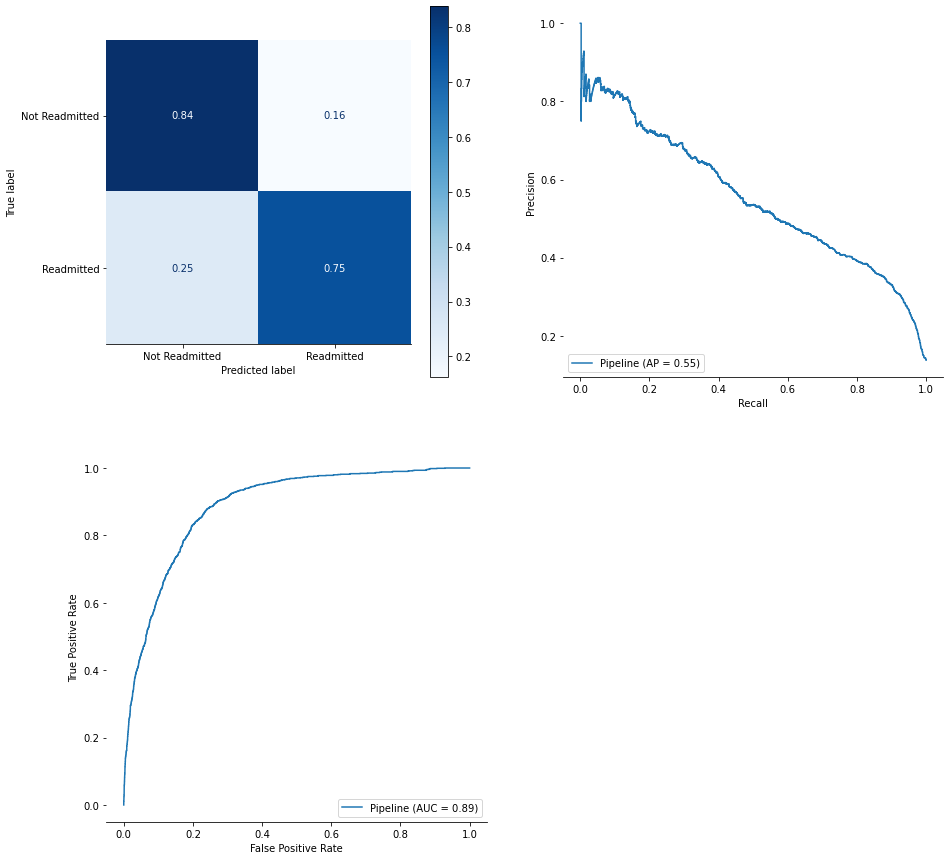

In [96]:
pipeline_trainer.train_test_model(logreg_rfe_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())],

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


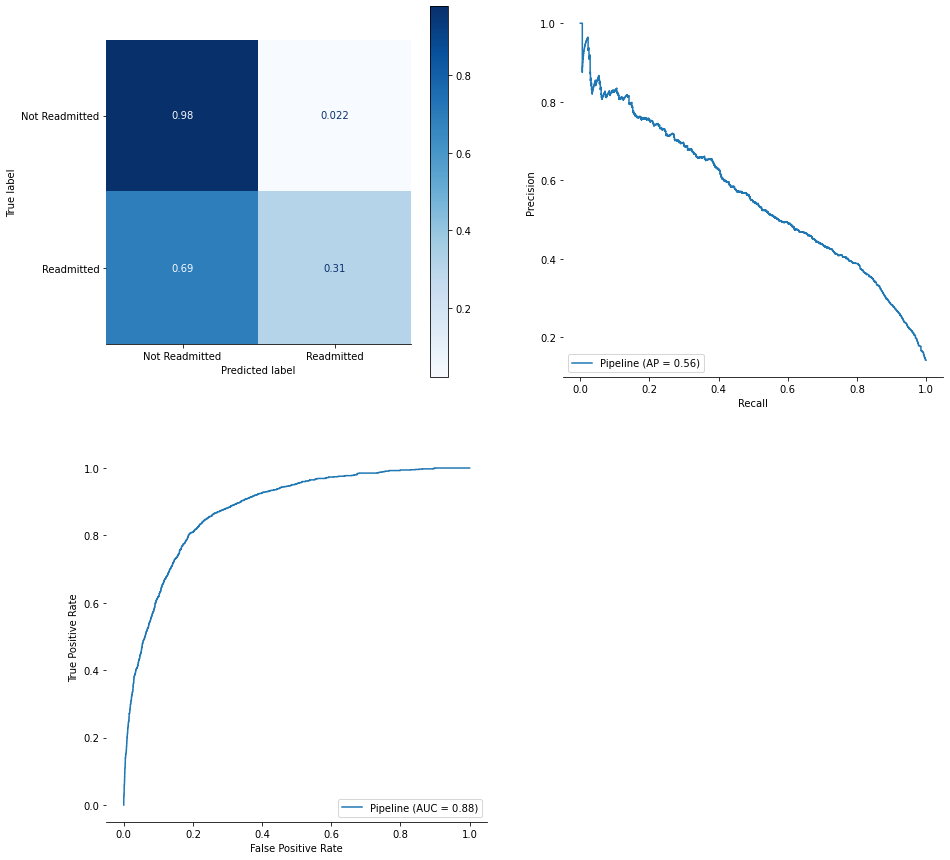

In [97]:
pipeline_trainer.train_test_model(logreg_rfe_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                           verbose=1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021907AB1348>)],
                                   verbose=1)),
                ('Random oversampling', RandomOverSampler(random_state=420))

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


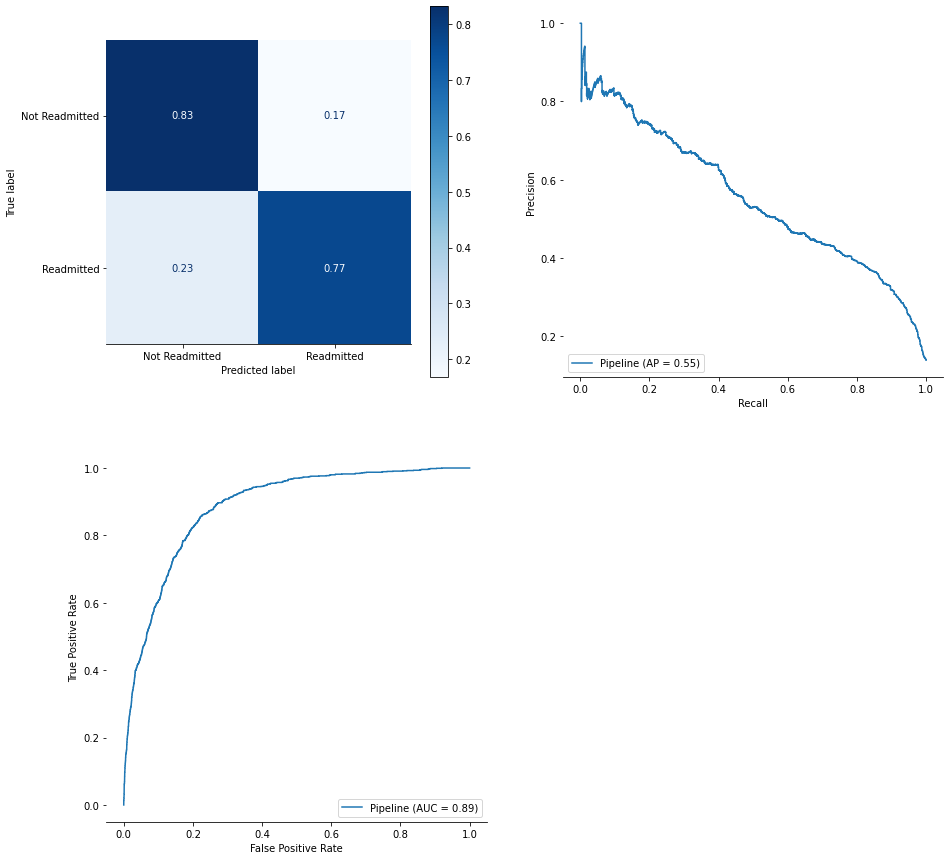

In [98]:
pipeline_trainer.train_test_model(logreg_rfe_randover_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021907AB1348>)],
                                   verbose=1)),
                ('SMOTE oversampling', SMOTE(n_jobs=-1, random_state=420)),
                ('Feature Selection',
                 RFE(estimator=De

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


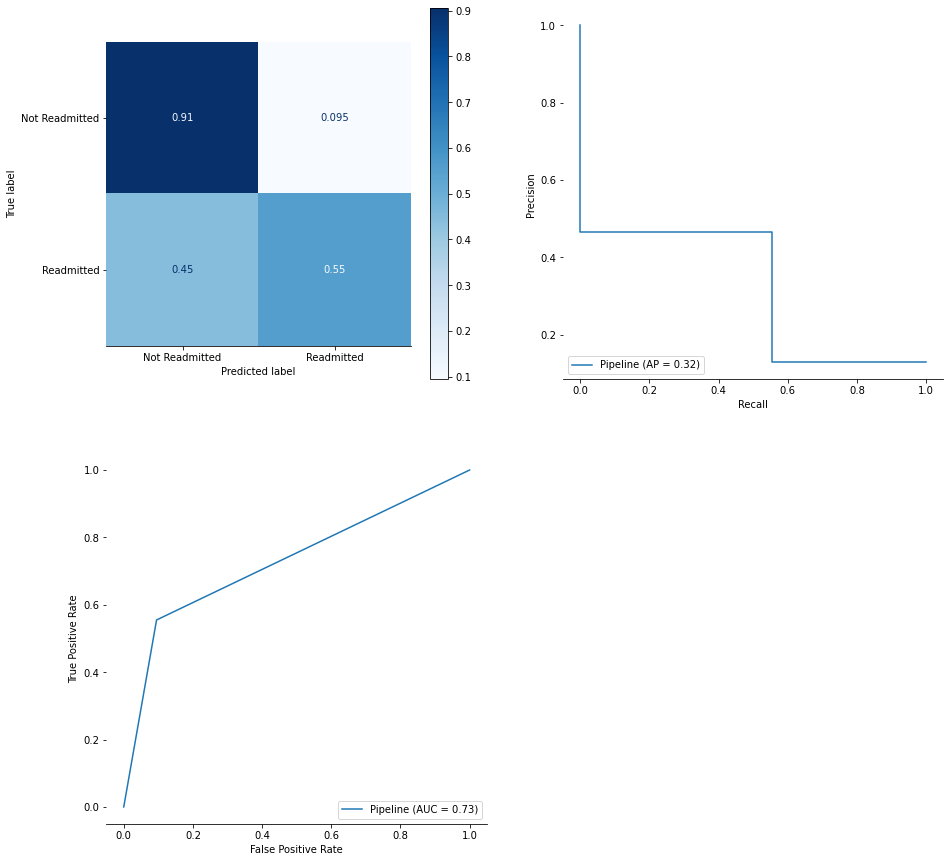

In [99]:
pipeline_trainer.train_test_model(dt_rfe_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021907AB1348>)],
                                                    verbose=1))],
                          verbose=1)),
                ('Feature Selection',
               

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


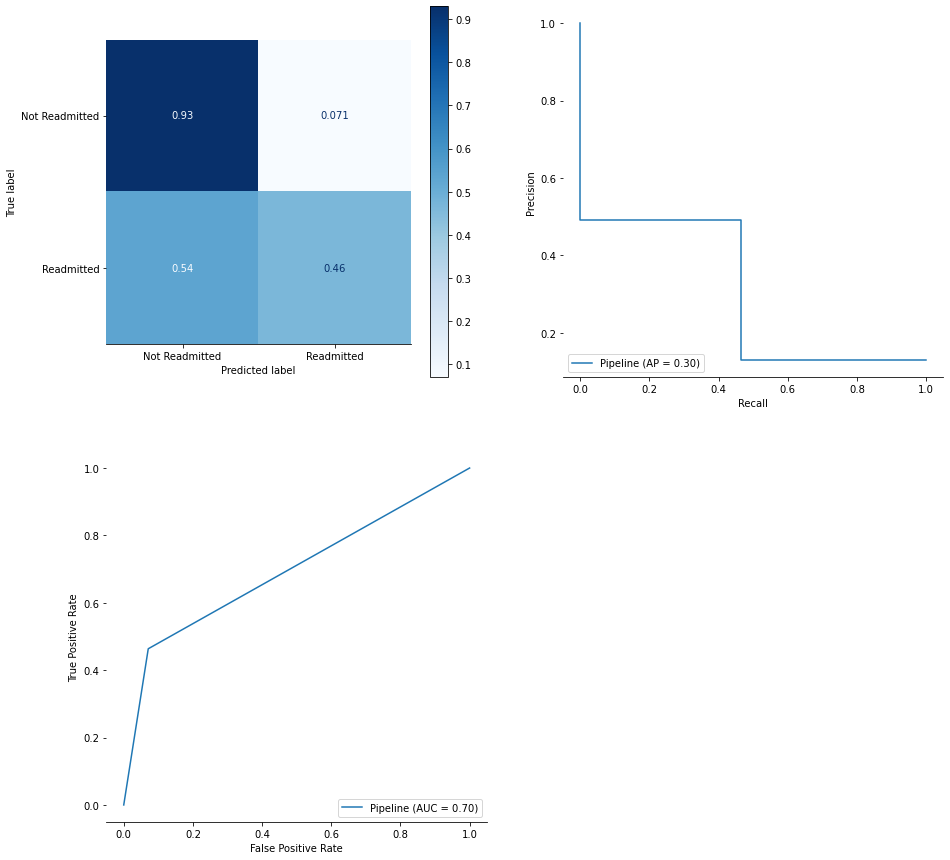

In [100]:
pipeline_trainer.train_test_model(dt_rfe_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021907AB1348>)],
                                   verbose=1)),
                ('Random oversampling', RandomOverSampler(random_state=420)),
                ('Feature Selection',
                 RFE(estimator=

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


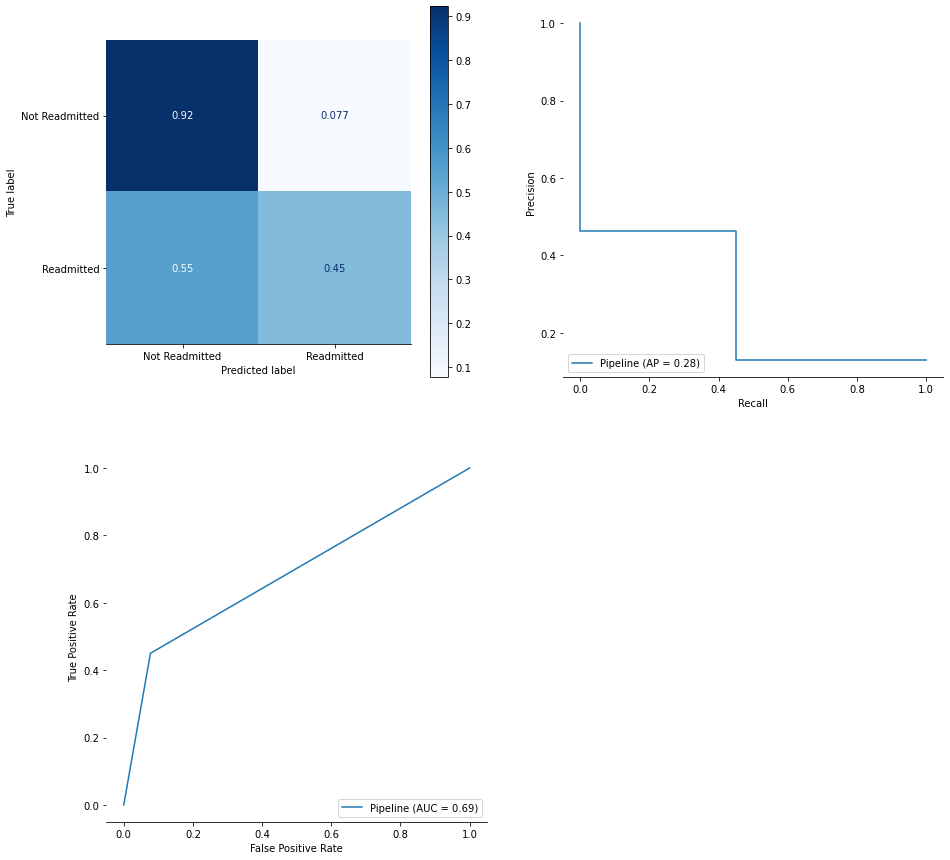

In [101]:
pipeline_trainer.train_test_model(dt_rfe_randover_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                ('Feature Selection',
                 RFE(estimator=RandomForestClassifier(bootstrap=False,
                                                      max_features=0.440238968203593,
                                                      n_estimators=88,
                                                      n_jobs=-1,
     

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.2s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.2s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

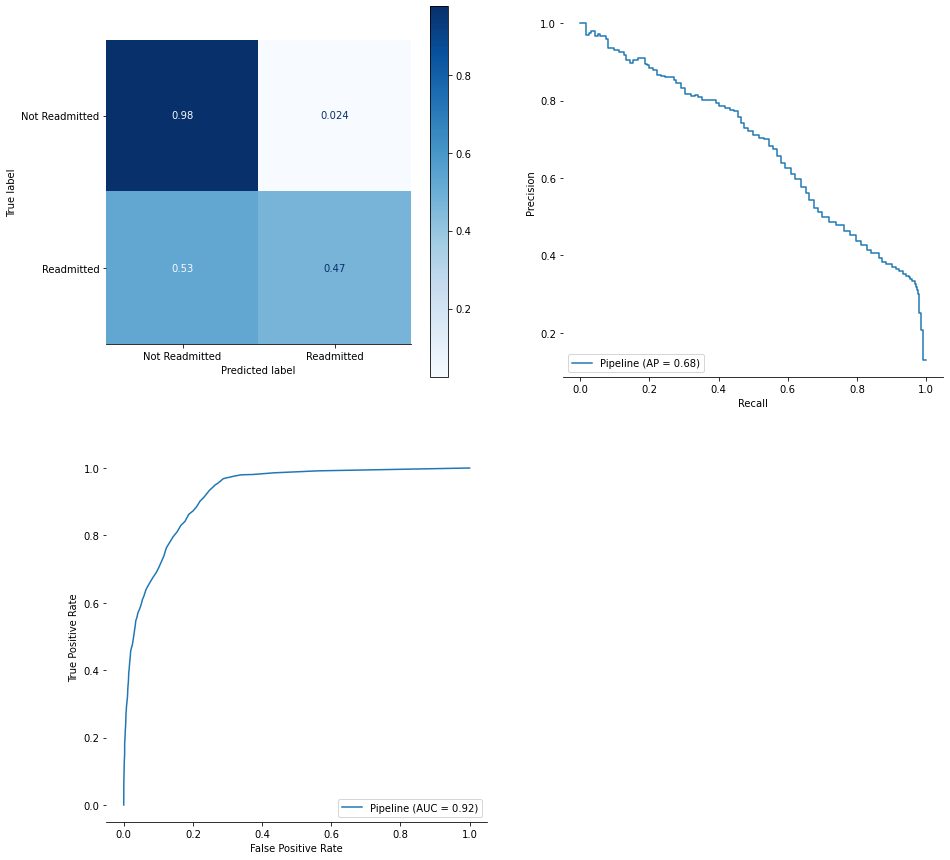

In [102]:
pipeline_trainer.train_test_model(rfc_rfe_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                ('Feature Selection',
                 RFE(estimator=RandomForestClassifier(bootstrap=False,
                                                      max_features=0.440238968203593,
                                                      n_estimators=88,
                                                  

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

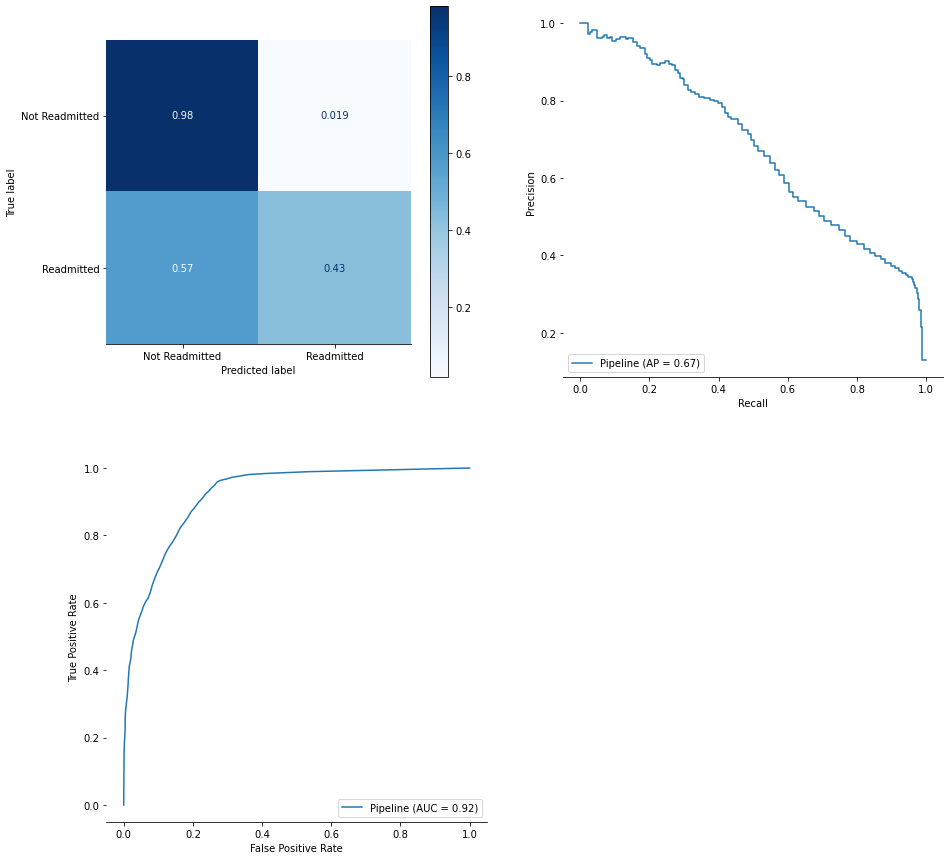

In [103]:
pipeline_trainer.train_test_model(rfc_rfe_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                ('Feature Selection',
                 RFE(estimator=RandomForestClassifier(bootstrap=False,
                                                      max_features=0.440238968203593,
                                                      n_estimators=88,
                                                      n_jobs=-1,
     

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.2s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

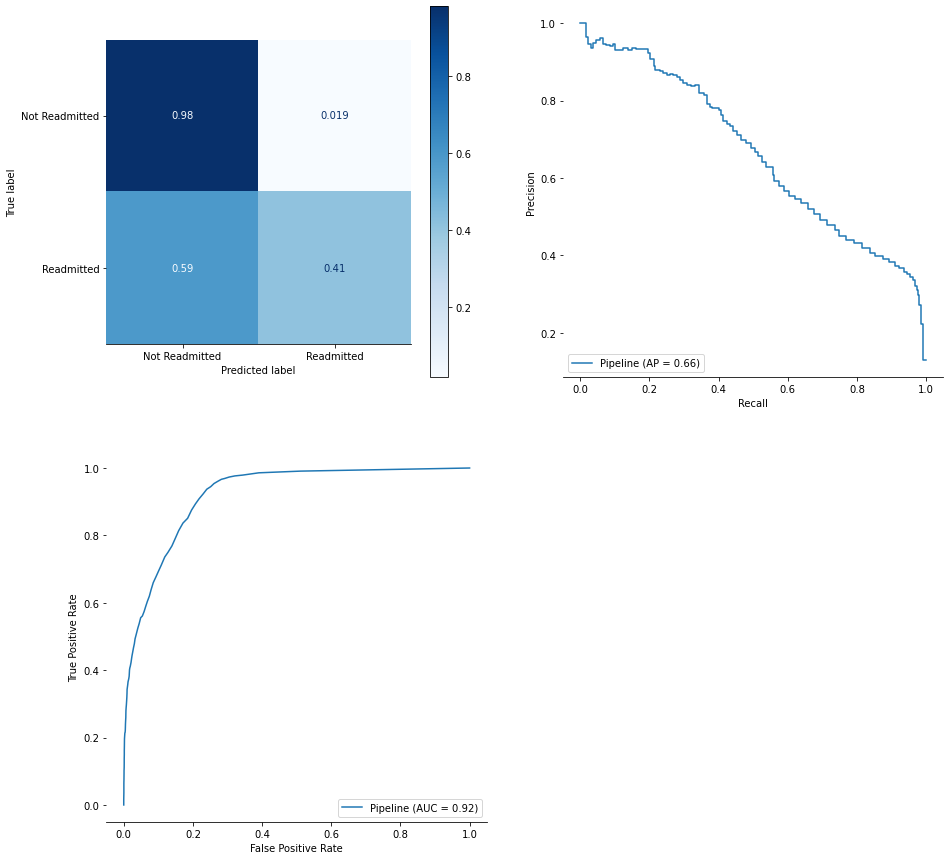

In [104]:
pipeline_trainer.train_test_model(rfc_rfe_randover_pipeline)



======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


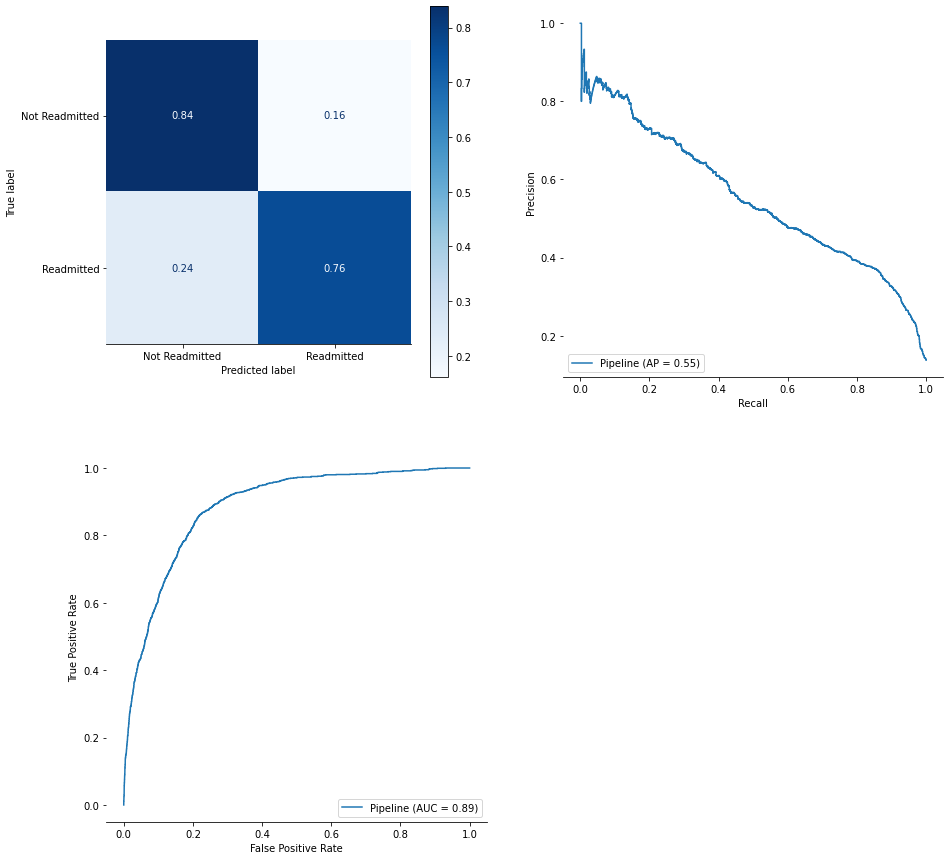

In [105]:
pipeline_trainer.train_test_model(logreg_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                   Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                                            steps=[('imputer_with_medium',
                                                    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


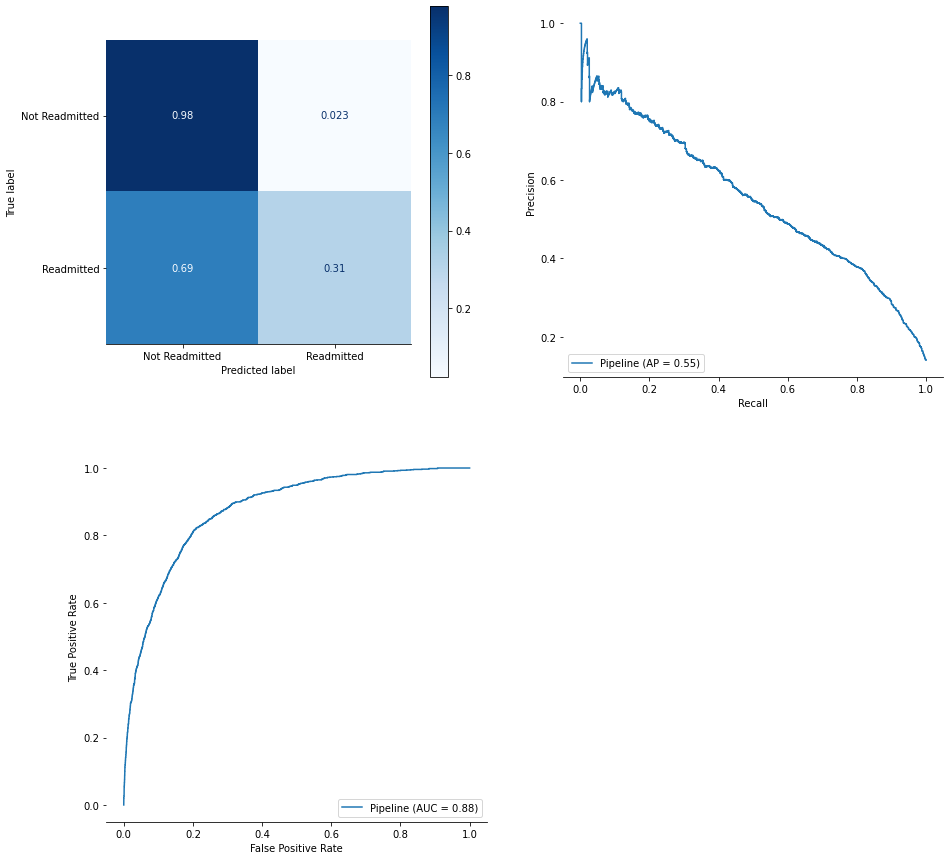

In [106]:
pipeline_trainer.train_test_model(logreg_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


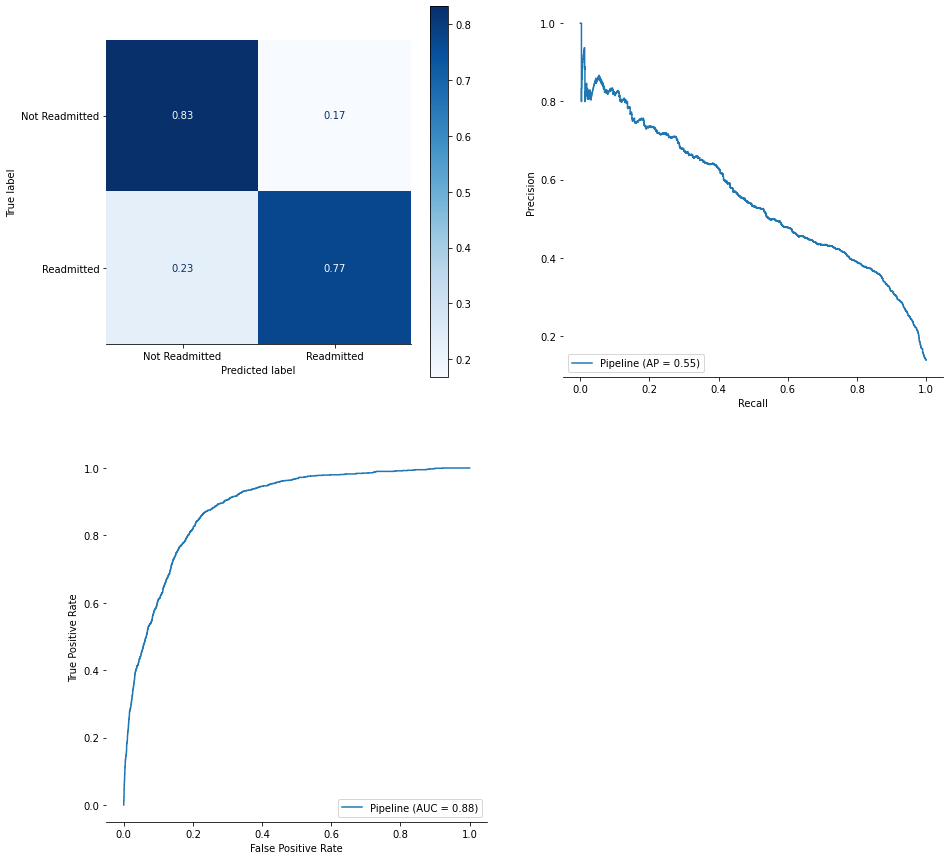

In [107]:
pipeline_trainer.train_test_model(logreg_randover_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


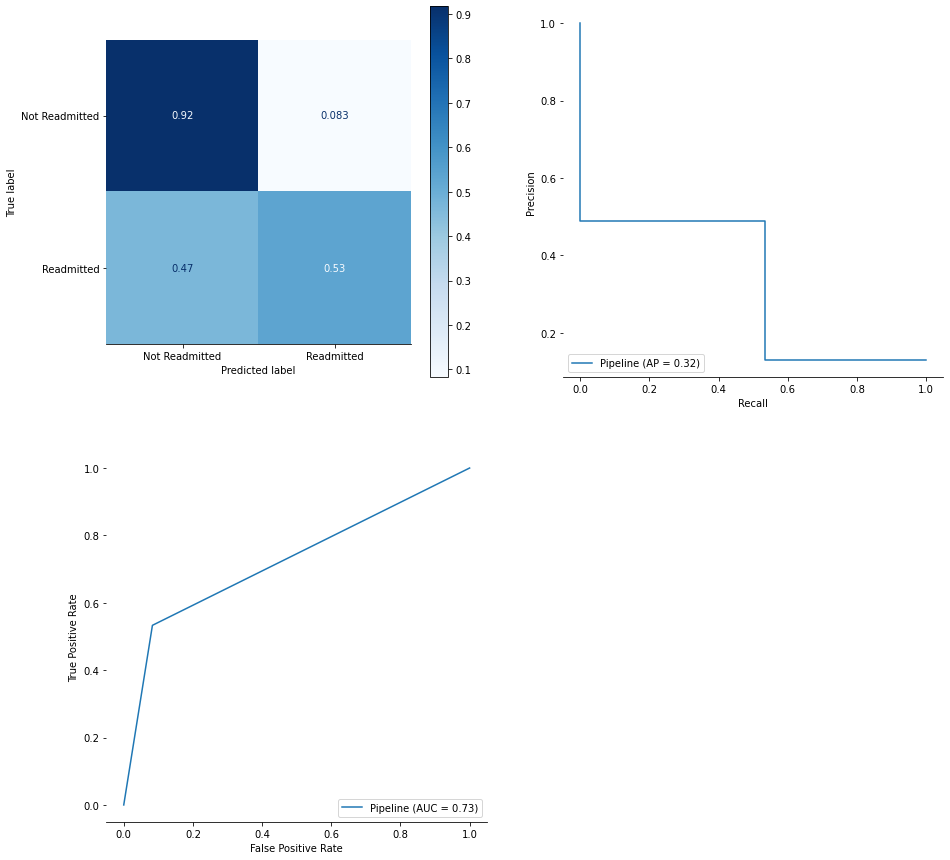

In [108]:
pipeline_trainer.train_test_model(dt_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                   Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                                            steps=[('imputer_with_medium',
                                                    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


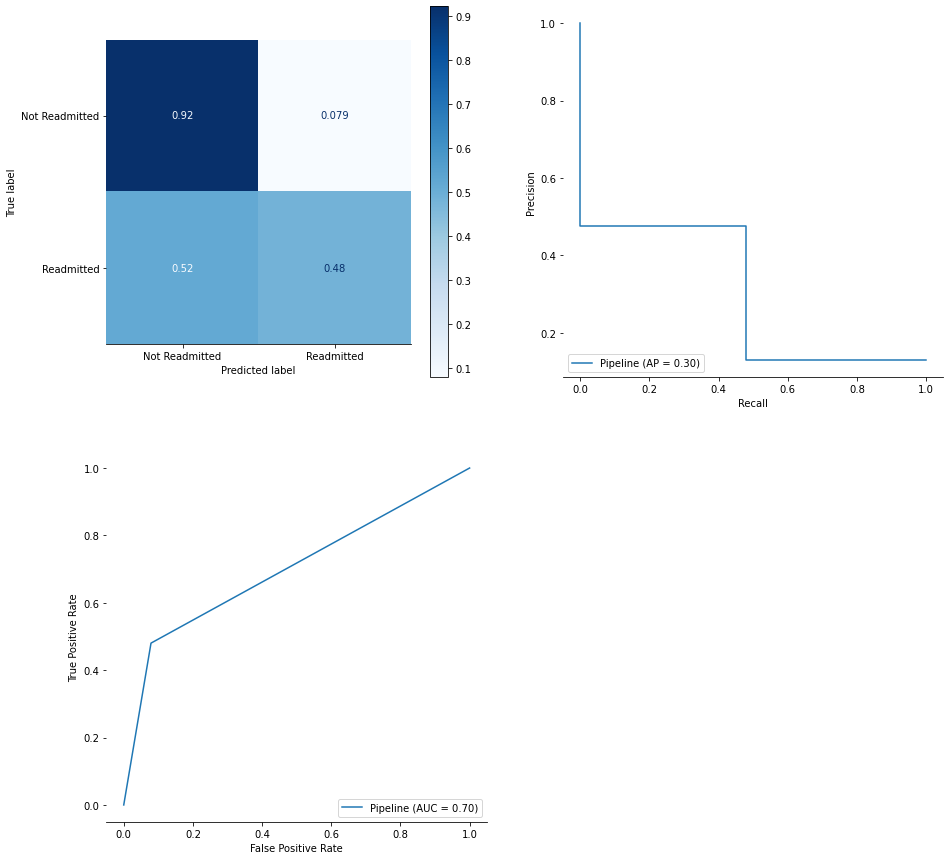

In [109]:
pipeline_trainer.train_test_model(dt_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


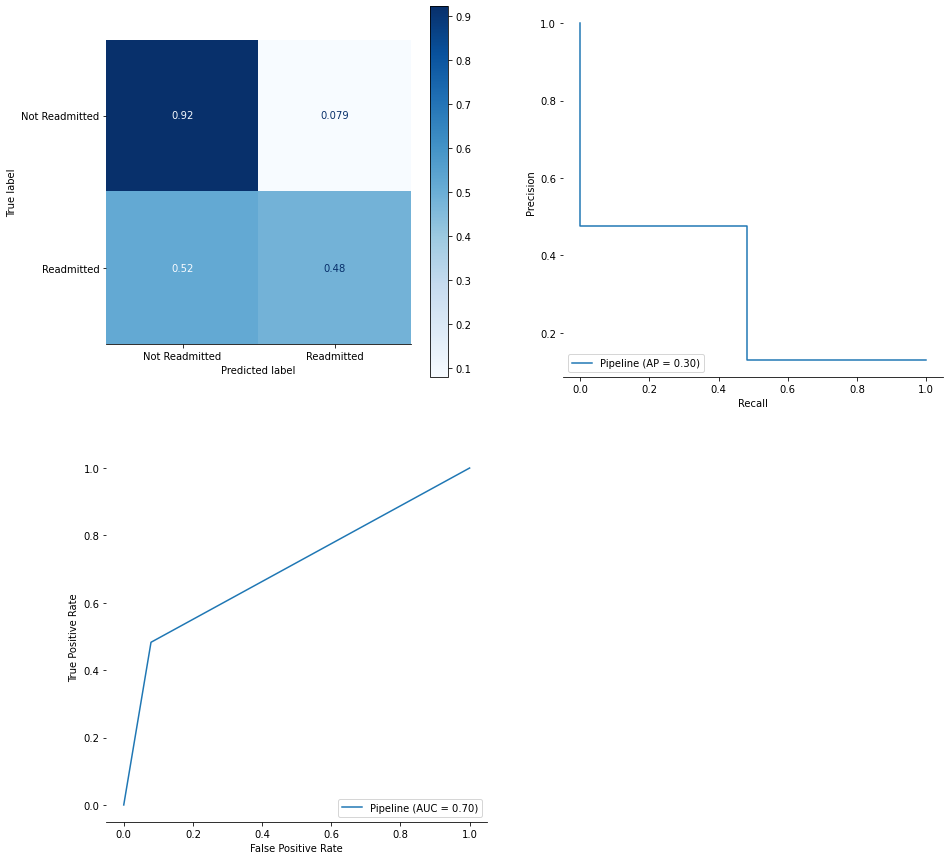

In [110]:
pipeline_trainer.train_test_model(dt_randover_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


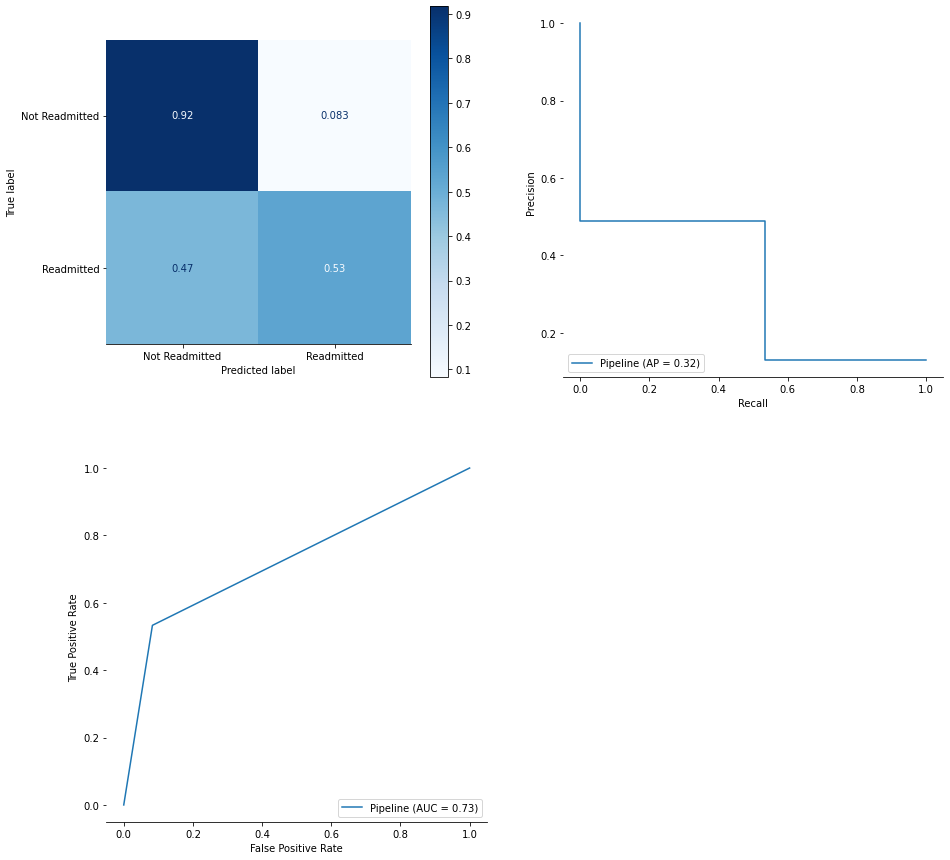

In [111]:
pipeline_trainer.train_test_model(rfc_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                            steps=[('imputer_with_medium',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scale

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.3s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

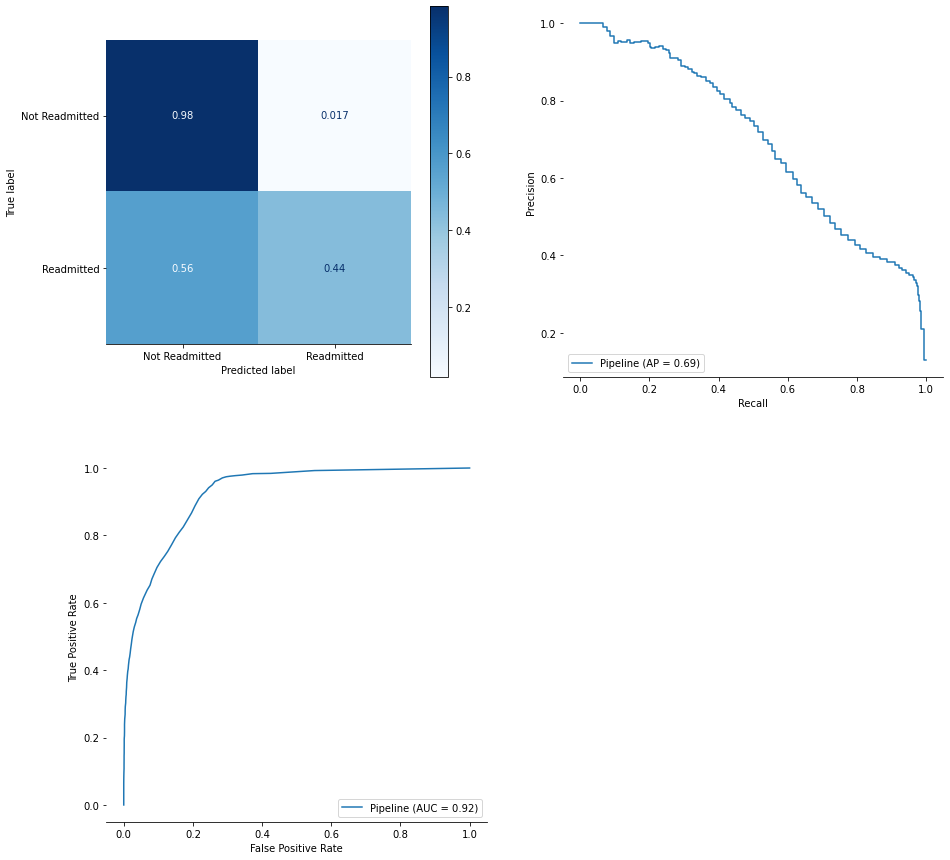

In [112]:
pipeline_trainer.train_test_model(rfc_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\num24i9itu1\joblib),
                                                           steps=[('imputer_with_medium',
                                                                   SimpleImputer(strategy='median')),
    

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called


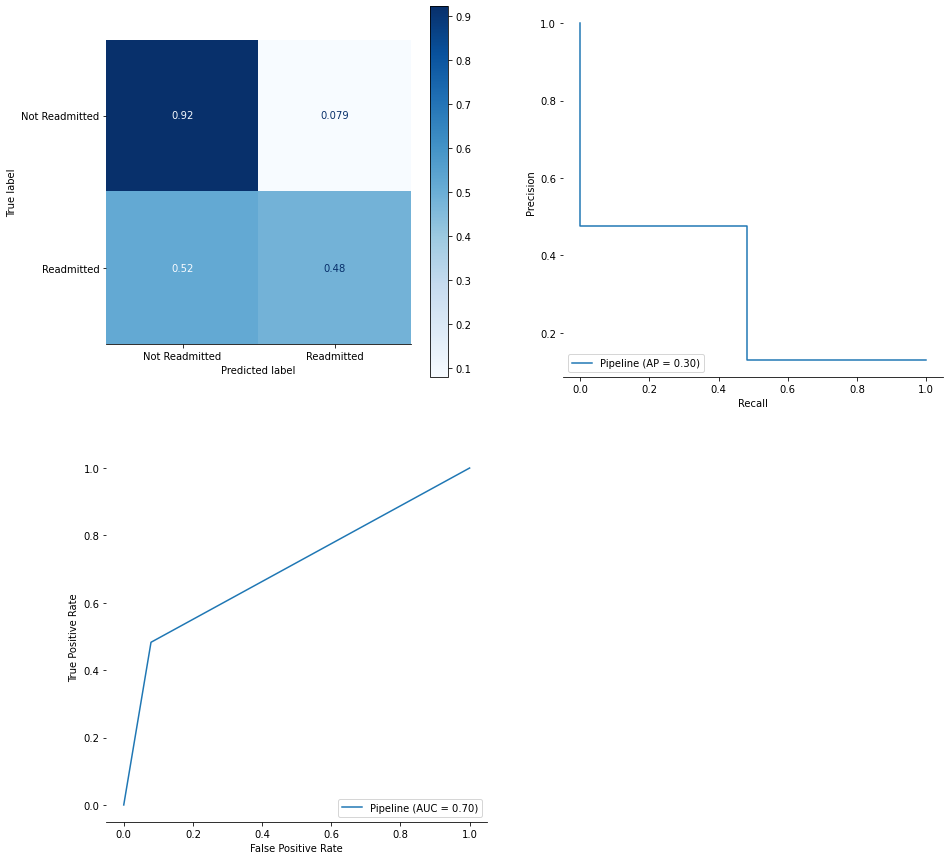

In [113]:
pipeline_trainer.train_test_model(rfc_randover_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())],
                                                           verbose=1),

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

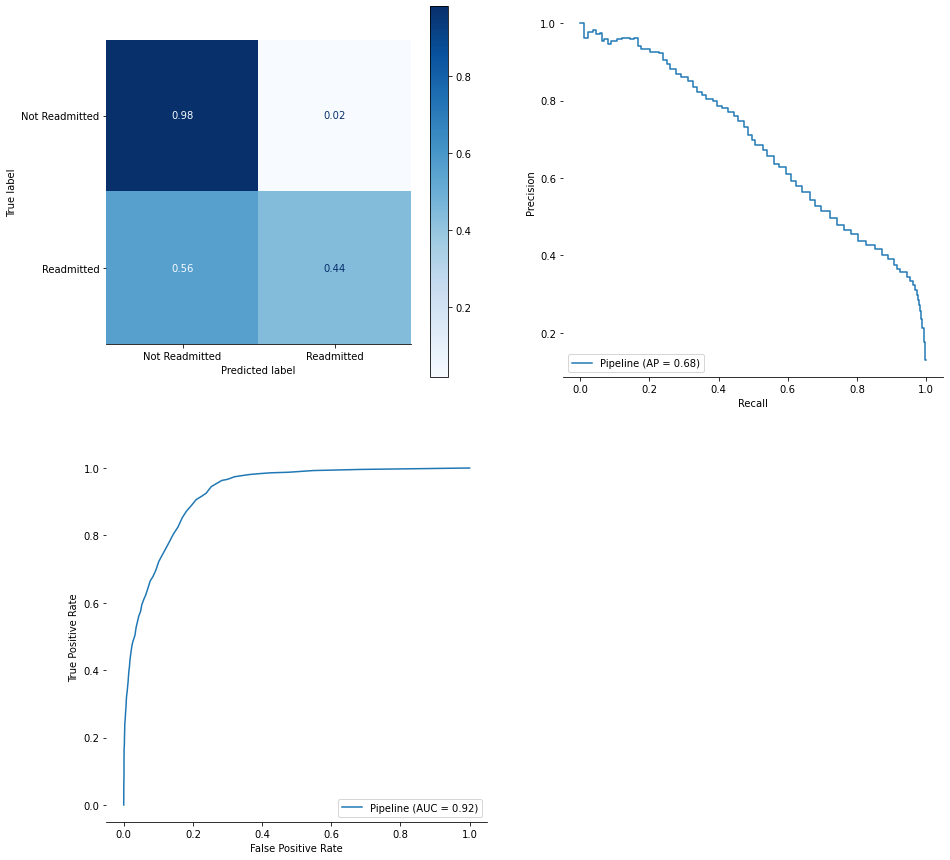

In [114]:
pipeline_trainer.train_test_model(extratrees_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                                            steps=[('imputer_with_medium',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scale

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.3s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.3s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

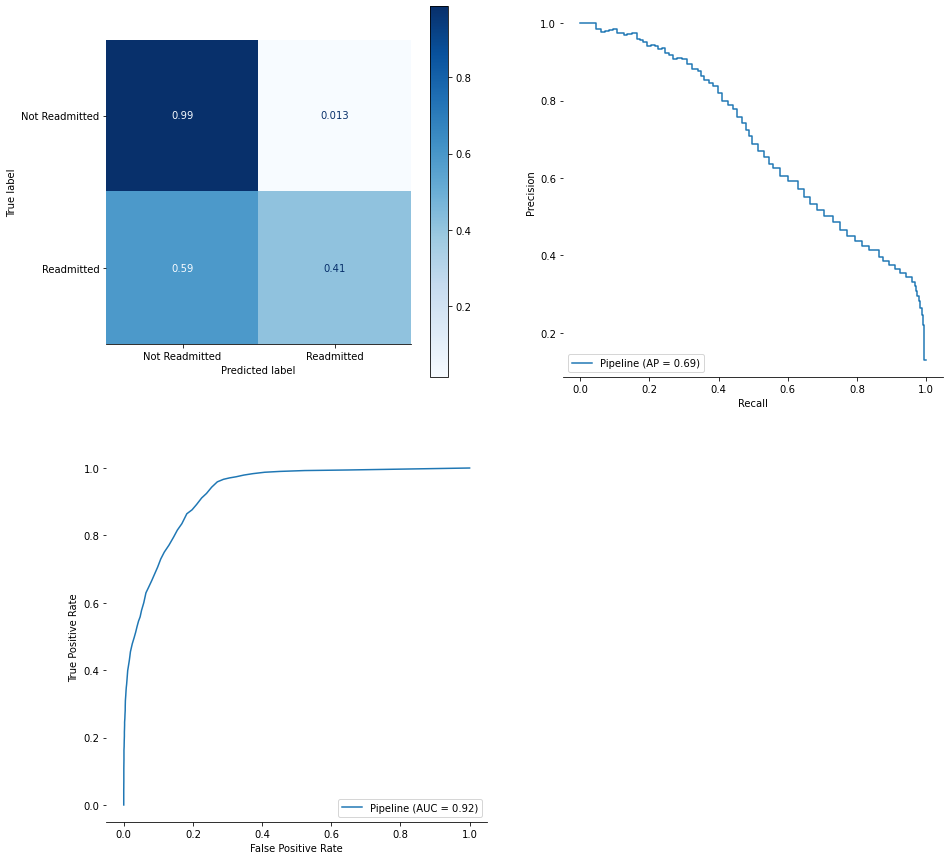

In [115]:
pipeline_trainer.train_test_model(extratrees_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())],
                                                           verbose=1),

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

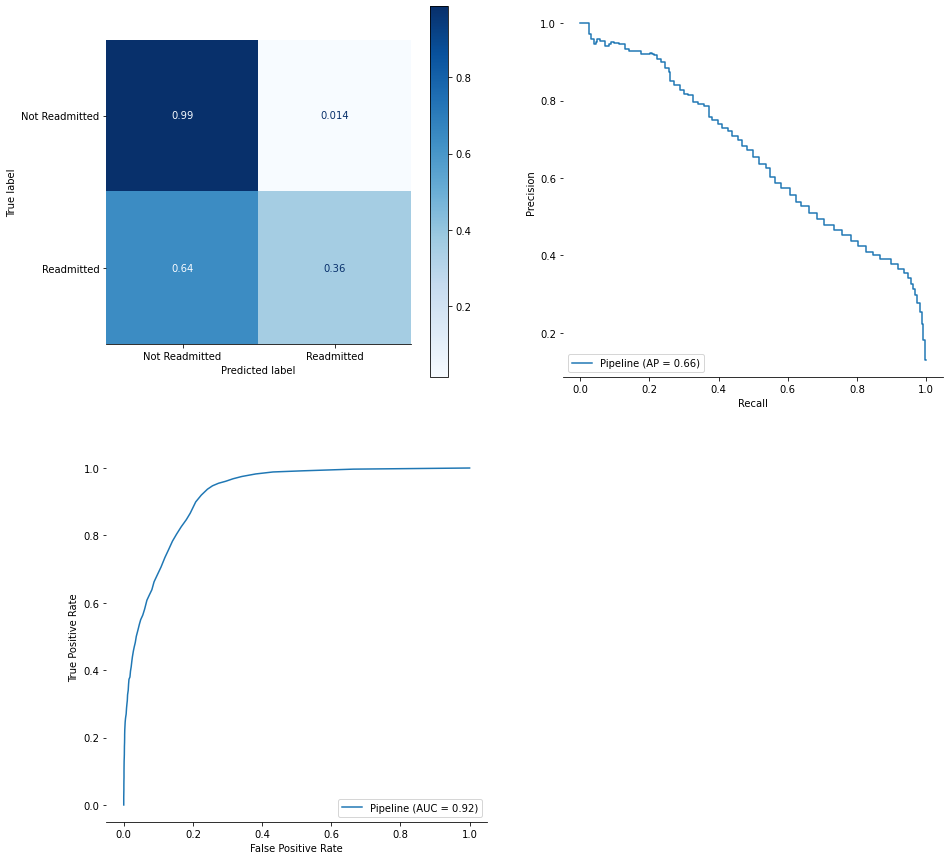

In [116]:
pipeline_trainer.train_test_model(extratrees_randover_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                ('SMOTE oversampling', SMOTE(n_jobs=-1, random_state=420)),
                ('Feature Selection',
                 RFE(estimator=ExtraTreesClassifier(max_features=0.7363742386320187,
                                                    n_estimators=80, n_jobs=-1,
                                                    rando

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

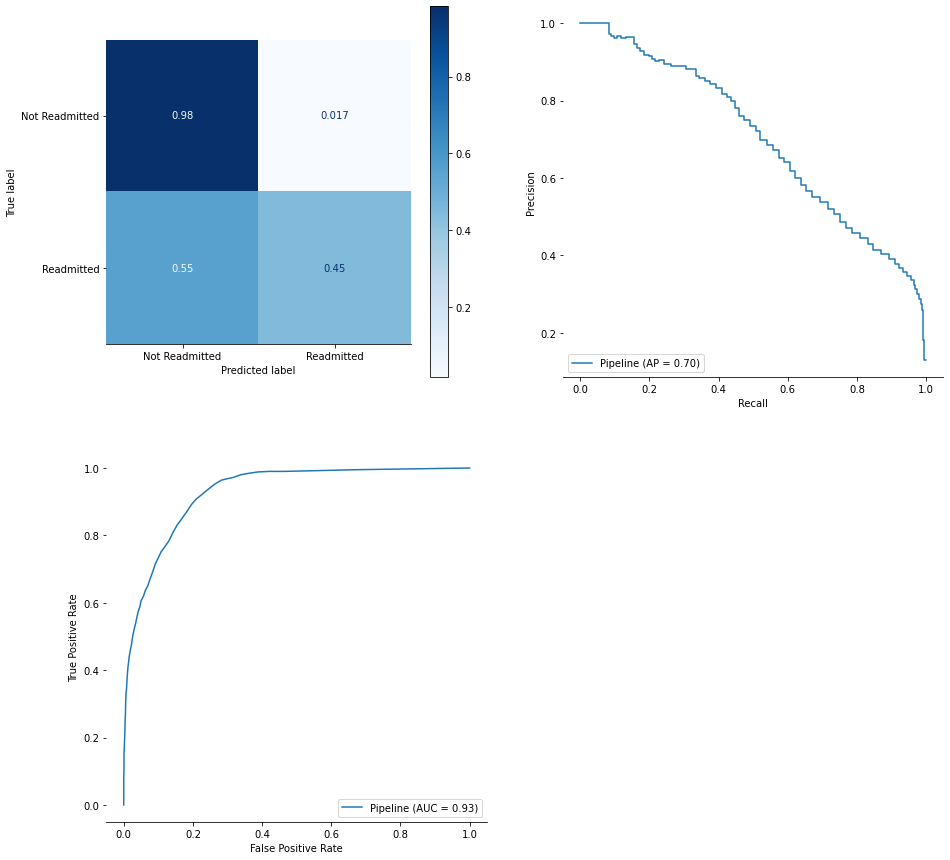

In [117]:
pipeline_trainer.train_test_model(extratrees_rfe_smote_pipeline)


======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('Preprocessing Step',
                 Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                          steps=[('column selector',
                                  SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                   'MEDREIMB_CAR'],
                                                          drop=True)),
                                 ('Preprocessing Step',
                                  ColumnTransformer(trans...
                                                    verbose=1))],
                          verbose=1)),
                ('Feature Selection',
                 RFE(estimator=ExtraTreesClassifier(max_features=0.7363742386320187,
                                                    n_estimators=80, n_jobs=-1,
        

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

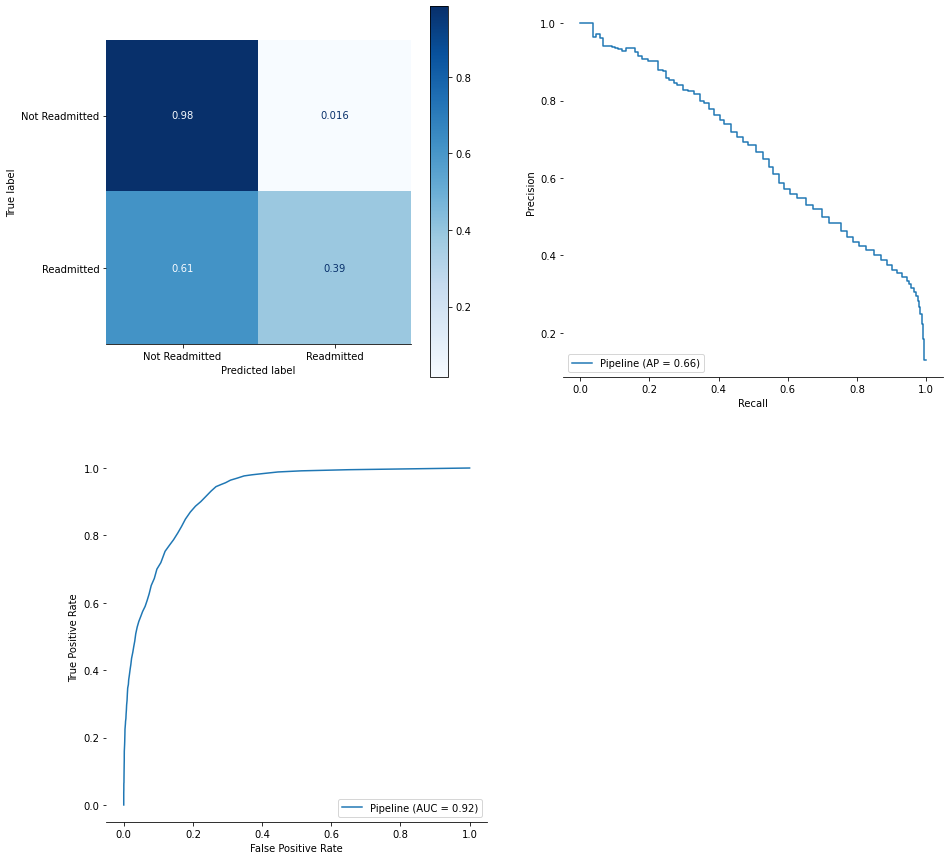

In [118]:
pipeline_trainer.train_test_model(extratrees_rfe_pipeline)

======================================== Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
         steps=[('drop columns',
                 SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                  'MEDREIMB_CAR'],
                                         drop=True)),
                ('Preprocessing Step',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catjb4669x9\joblib),
                                                           steps=[...
                ('Random oversampling', RandomOverSampler(random_state=420)),
                ('Feature Selection',
                 RFE(estimator=ExtraTreesClassifier(max_features=0.7363742386320187,
                                                    n_estimators=80, n_jobs=-1,
                                                    ran

True


<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.3s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks   

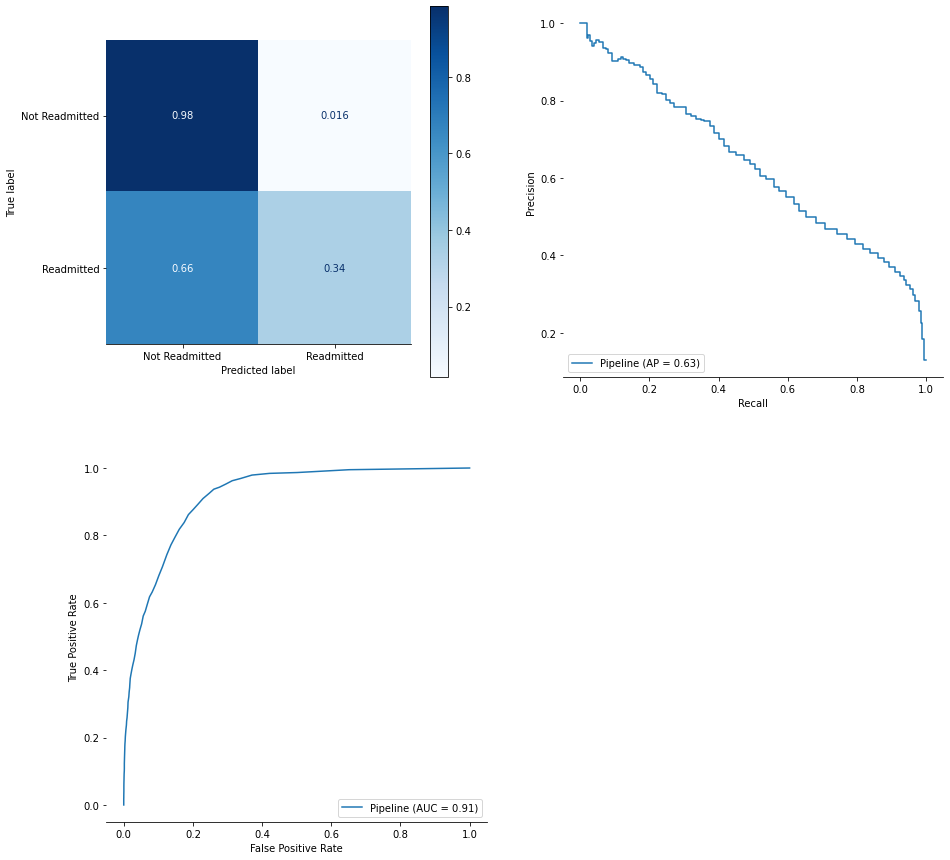

In [119]:
pipeline_trainer.train_test_model(extratrees_rfe_randover_pipeline)


======================================== VotingClassifier(estimators=[('extratrees_pipeline',
                              Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                                       steps=[('Preprocessing Step',
                                               Pipeline(memory=Memory(location=C:\Users\SAURAB~1\AppData\Local\Temp\catxhnpinp6\joblib),
                                                        steps=[('column '
                                                                'selector',
                                                                SelectColumnsTransfomer(columns=['MEDREIMB_OP',
                                                                                                 'MEDREIMB_CAR'],
                                                                                        dr...
                                                                                                              

False
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  88 out of  88 | elapsed:    0.4s finished
<class 'utils.CustomPipeline.SelectColumnsTransfomer'> Transform method called
<class 'utils.CustomPipeline.CardinalityReducer'> Transform method called
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 ta

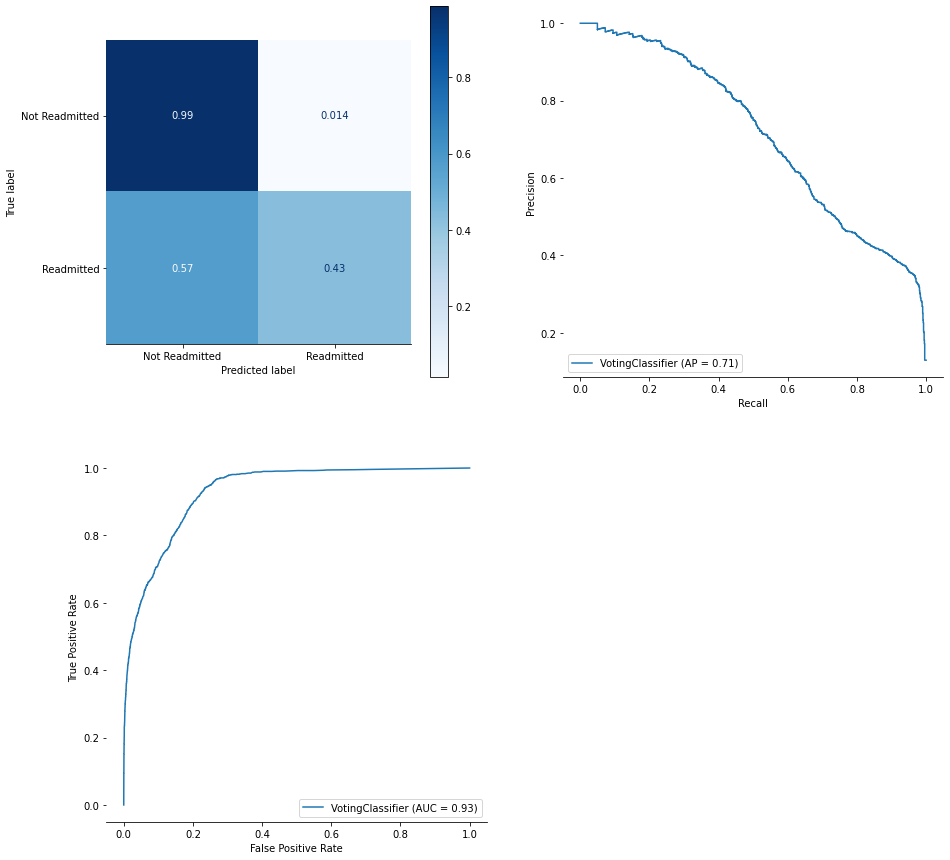

In [120]:
estimators = [
    ("extratrees_pipeline", extratrees_pipeline),
    ("rfc_pipeline", rfc_pipeline),
]
voting_clf = VotingClassifier(
    estimators=estimators,
    voting="soft",
    n_jobs=N_JOB_PARAM_VALUE,
    verbose=VERBOSE_PARAM_VALUE,
)
ensemble_trainer.train_test_model(voting_clf)